# Import data

In [2]:
import pandas as pd

In [3]:
Netflix_Data = pd.read_csv('Netflix data.csv')

In [4]:
Netflix_Data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


# Data-set conceptual description 

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

id: The title ID on JustWatch.

title: The name of the title.

type: TV show or movie. 

description: A brief description.

release_year: The release year. (año de lanzamiento)

age_certification: The age certification. (la calificación de edad)

runtime: The length of the episode (SHOW) or movie. (el nº de episiodios (show), el tiempo de durancion en minutos (movie))

genres: A list of genres.

production_countries: A list of countries that produced the title.

seasons: Number of seasons if it's a SHOW.

imdb_id: The title ID on IMDB.

imdb_score: Score on IMDB. (puntuacion en IMDB)

imdb_votes: Votes on IMDB. (nº de votos en IMDB)

tmdb_popularity: Popularity on TMDB.

tmdb_score: Score on TMDB. (puntiaccion en TMDB)

## Number of rows and columns 

In [5]:
Netflix_Data.shape

(5850, 15)

This data-set has 5850 rows (observations) and 15 columns (variables).

## info() method

In [6]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

info() method give us column names, number of non null values in each column and column type.

# Dtypes method

In [7]:
Netflix_Data.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

It's another way to get column types.

# Change  type of a variable/column

In [8]:
def change_type(Data, Variable_name, New_type):

    Data[Variable_name] = Data[Variable_name].astype(New_type)

In [9]:
Netflix_Data.dtypes['release_year']

dtype('int64')

In [10]:
change_type(Data=Netflix_Data, Variable_name='release_year', New_type='float64')

In [11]:
Netflix_Data.dtypes['release_year']

dtype('float64')

# Unique values of a variable:

In [12]:
Netflix_Data['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [13]:
Netflix_Data['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [14]:
Netflix_Data['production_countries'].unique()     

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

# Identificación de NaN

## Proporcion de valores faltantes por columna:

In [15]:
def Prop_NaN(Data):

    df_prop_nan = Data.isnull().sum() / len(Data)

    return df_prop_nan

In [16]:
Prop_NaN(Data=Netflix_Data)

id                      0.000000
title                   0.000171
type                    0.000000
description             0.003077
release_year            0.000000
age_certification       0.447692
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.640000
imdb_id                 0.068889
imdb_score              0.082393
imdb_votes              0.085128
tmdb_popularity         0.015556
tmdb_score              0.053162
dtype: float64

# Tratamiento de NaN

## Seleccionar todas las columnas que no tienen NaN


In [17]:
Netflix_Data = pd.read_csv('Netflix data.csv')

In [18]:
Netflix_Data

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [19]:
Netflix_Data.dropna(axis=1, how='all') 

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [20]:
Netflix_Data.dropna(axis=1, how='any') 

,id,type,release_year,runtime,genres,production_countries
0,ts300399,SHOW,1945,51,['documentation'],['US']
1,tm84618,MOVIE,1976,114,"['drama', 'crime']",['US']
2,tm154986,MOVIE,1972,109,"['drama', 'action', 'thriller', 'european']",['US']
3,tm127384,MOVIE,1975,91,"['fantasy', 'action', 'comedy']",['GB']
4,tm120801,MOVIE,1967,150,"['war', 'action']","['GB', 'US']"
...,...,...,...,...,...,...
5845,tm1014599,MOVIE,2021,100,"['romance', 'drama']",['NG']
5846,tm898842,MOVIE,2021,134,['drama'],[]
5847,tm1059008,MOVIE,2021,90,['comedy'],['CO']
5848,tm1035612,MOVIE,2021,37,[],['US']


In [21]:
Netflix_Data['imdb_score'].dropna( how='any') 

1       8.2
2       7.7
3       8.2
4       7.7
5       8.8
       ... 
5843    5.0
5845    6.8
5846    7.7
5847    3.8
5849    7.8
Name: imdb_score, Length: 5368, dtype: float64

Eliminar columnas con un porcentaje de NaN superior a determinado punto de corte

In [22]:
Prop_NaN(Netflix_Data)

id                      0.000000
title                   0.000171
type                    0.000000
description             0.003077
release_year            0.000000
age_certification       0.447692
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.640000
imdb_id                 0.068889
imdb_score              0.082393
imdb_votes              0.085128
tmdb_popularity         0.015556
tmdb_score              0.053162
dtype: float64

In [23]:
Prop_NaN(Netflix_Data)[Netflix_Data.columns[5]]

0.44769230769230767

In [24]:
def Drop_Columns_NaN(Data, limit_prop)  :

    Data_new = Data.copy()

    for i in Data.columns :

        if Prop_NaN(Data)[i] > limit_prop :

            Data_new = Data_new.drop( [i] , axis=1)

    return Data_new

In [25]:
Drop_Columns_NaN(Data=Netflix_Data, limit_prop = 0.1)

,id,title,type,description,release_year,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,51,['documentation'],['US'],NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,150,"['war', 'action']","['GB', 'US']",tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,100,"['romance', 'drama']",['NG'],tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,134,['drama'],[],tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,37,[],['US'],NaN,NaN,NaN,1.296,10.000



## Seleccionar todas las filas que no tienen NaN en cierta columna/s

In [26]:
Netflix_Data.dropna(axis=0, how='any')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
26,ts45948,Monty Python's Fliegender Zirkus,SHOW,Monty Python's Fliegender Zirkus consisted of ...,1972,TV-MA,43,['comedy'],[],1.0,tt0202477,8.1,2151.0,1.487,7.000
35,ts20681,Seinfeld,SHOW,A stand-up comedian and his three offbeat frie...,1989,TV-PG,24,['comedy'],['US'],9.0,tt0098904,8.9,308824.0,130.213,8.301
44,ts22082,Knight Rider,SHOW,"Michael Long, an undercover police officer, is...",1982,TV-PG,51,"['scifi', 'action', 'crime', 'drama']",['US'],4.0,tt0083437,6.9,34115.0,50.267,7.500
45,ts21715,Thomas & Friends,SHOW,Thomas & Friends is a British children's telev...,1984,TV-Y,10,"['animation', 'family', 'comedy', 'fantasy', '...",['GB'],24.0,tt0086815,6.5,5104.0,42.196,6.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5784,ts285471,The Wedding Coach,SHOW,Former bride and forever comedian Jamie Lee sh...,2021,TV-MA,33,"['comedy', 'reality']",['US'],1.0,tt14210424,5.0,87.0,1.525,10.000
5785,ts325991,Only Jokes Allowed,SHOW,Six of South Africa's top comedians take cente...,2022,TV-MA,16,['comedy'],['ZA'],1.0,tt17052148,4.9,45.0,1.629,10.000
5801,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.000
5819,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,tt14512938,8.3,2346.0,1.493,9.000


In [27]:
Netflix_Data.dropna(axis=0, how='all')

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.000


In [28]:
Netflix_Data.dropna(axis=0, how='any', subset=['age_certification', 'imdb_score'])
# se eliminan las filas que tienen NaN en alguna de las columnas especificadas en subset

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,tm982470,Stuck Apart,MOVIE,"Entrenched in a midlife crisis, Aziz seeks sol...",2021,R,96,"['comedy', 'drama']",['TR'],NaN,tt11213372,6.0,10515.0,7.403,6.200
5801,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.000
5819,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,tt14512938,8.3,2346.0,1.493,9.000
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN


In [29]:
Netflix_Data.dropna(axis=0, how='any', subset=['age_certification', 'imdb_score'])
# se eliminan las filas que tienen NaN en todas las columnas especificadas en subset

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,73424.0,17.617,8.306
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5800,tm982470,Stuck Apart,MOVIE,"Entrenched in a midlife crisis, Aziz seeks sol...",2021,R,96,"['comedy', 'drama']",['TR'],NaN,tt11213372,6.0,10515.0,7.403,6.200
5801,ts270616,We Are: The Brooklyn Saints,SHOW,A Brooklyn youth football program and its self...,2021,TV-14,47,"['documentation', 'sport']",['US'],1.0,tt13656220,6.5,162.0,2.523,10.000
5819,ts287729,Alma Matters: Inside the IIT Dream,SHOW,"In a ""nation of middle-class"" the IIT dream in...",2021,TV-MA,49,"['documentation', 'drama']",['IN'],1.0,tt14512938,8.3,2346.0,1.493,9.000
5830,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],1.0,tt15978704,8.2,5.0,2.334,NaN


In [30]:
Netflix_Data.loc[:, ['age_certification', 'imdb_score']]

,age_certification,imdb_score
0,TV-MA,NaN
1,R,8.2
2,R,7.7
3,PG,8.2
4,NaN,7.7
...,...,...
5845,NaN,6.8
5846,NaN,7.7
5847,NaN,3.8
5848,PG-13,NaN


In [31]:
Netflix_Data.dropna(axis=0, how='any', subset=['age_certification', 'imdb_score'])[['age_certification', 'imdb_score']]

,age_certification,imdb_score
1,R,8.2
2,R,7.7
3,PG,8.2
5,TV-14,8.8
6,R,8.0
...,...,...
5800,R,6.0
5801,TV-14,6.5
5819,TV-MA,8.3
5830,TV-14,8.2


In [32]:
Netflix_Data.dropna(axis=0, how='all', subset=['age_certification', 'imdb_score'])[['age_certification', 'imdb_score']]

,age_certification,imdb_score
0,TV-MA,NaN
1,R,8.2
2,R,7.7
3,PG,8.2
4,NaN,7.7
...,...,...
5845,NaN,6.8
5846,NaN,7.7
5847,NaN,3.8
5848,PG-13,NaN


## Imputación de NaN

In [33]:
Netflix_Data.fillna(0)   

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,0,0.0,0.0,0.600,0.000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,0,150,"['war', 'action']","['GB', 'US']",0.0,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,0,100,"['romance', 'drama']",['NG'],0.0,tt13857480,6.8,45.0,1.466,0.000
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,0,134,['drama'],[],0.0,tt11803618,7.7,348.0,0.000,0.000
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,0,90,['comedy'],['CO'],0.0,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],0.0,0,0.0,0.0,1.296,10.000


In [34]:
Netflix_Data.fillna(999)   

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,999,999.0,999.0,0.600,999.000
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],999.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],999.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],999.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,999,150,"['war', 'action']","['GB', 'US']",999.0,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,999,100,"['romance', 'drama']",['NG'],999.0,tt13857480,6.8,45.0,1.466,999.000
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,999,134,['drama'],[],999.0,tt11803618,7.7,348.0,999.000,999.000
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,999,90,['comedy'],['CO'],999.0,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],999.0,999,999.0,999.0,1.296,10.000


In [35]:
Netflix_Data.fillna(method='bfill')  # Rellenar con el valor siguiente  

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,tt0075314,8.2,808582.0,0.600,8.179
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],4.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],4.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],4.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-14,150,"['war', 'action']","['GB', 'US']",4.0,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,PG-13,100,"['romance', 'drama']",['NG'],1.0,tt13857480,6.8,45.0,1.466,6.300
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,PG-13,134,['drama'],[],1.0,tt11803618,7.7,348.0,26.005,6.300
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,PG-13,90,['comedy'],['CO'],1.0,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],1.0,tt13711094,7.8,18.0,1.296,10.000


In [36]:
Netflix_Data.fillna(method='ffill')  # Rellenar con el valor anterior

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],1.0,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],1.0,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],1.0,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,PG,150,"['war', 'action']","['GB', 'US']",1.0,tt0061578,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,TV-14,100,"['romance', 'drama']",['NG'],1.0,tt13857480,6.8,45.0,1.466,5.300
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,TV-14,134,['drama'],[],1.0,tt11803618,7.7,348.0,1.466,5.300
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,TV-14,90,['comedy'],['CO'],1.0,tt14585902,3.8,68.0,26.005,6.300
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],1.0,tt14585902,3.8,68.0,1.296,10.000


In [37]:
Netflix_Data['imdb_score']

0       NaN
1       8.2
2       7.7
3       8.2
4       7.7
       ... 
5845    6.8
5846    7.7
5847    3.8
5848    NaN
5849    7.8
Name: imdb_score, Length: 5850, dtype: float64

In [38]:
Netflix_Data['imdb_score'].fillna(Netflix_Data['imdb_score'].mean())  # Rellenar con la media de la variable (sin contar sus NaN)

0       6.510861
1       8.200000
2       7.700000
3       8.200000
4       7.700000
          ...   
5845    6.800000
5846    7.700000
5847    3.800000
5848    6.510861
5849    7.800000
Name: imdb_score, Length: 5850, dtype: float64

In [39]:
Netflix_Data['imdb_score'].fillna(Netflix_Data['imdb_score'].median())  # Rellenar con la media de la variable (sin contar sus NaN)

0       6.6
1       8.2
2       7.7
3       8.2
4       7.7
       ... 
5845    6.8
5846    7.7
5847    3.8
5848    6.6
5849    7.8
Name: imdb_score, Length: 5850, dtype: float64

In [40]:
Netflix_Data['imdb_score'].fillna(Netflix_Data['imdb_score'].max())  # Rellenar con la media de la variable (sin contar sus NaN)

0       9.6
1       8.2
2       7.7
3       8.2
4       7.7
       ... 
5845    6.8
5846    7.7
5847    3.8
5848    9.6
5849    7.8
Name: imdb_score, Length: 5850, dtype: float64

funcion para imputar NaN de cuantitativas por la media o mediana, y de categoricas por la moda

In [41]:
def NaN_imputation(Data) :

    Data_new = Data.copy()

    for i in Data_new.columns :

        if (Data_new.dtypes[i] == 'float64') or (Data_new.dtypes[i] == 'int64') :

            Data_new[i] = Data_new[i].fillna(Data_new[i].mean())  

    
        if (Data_new.dtypes[i] == 'object') or (Data_new.dtypes[i] == 'category') :

            Data_new[i] = Data_new[i].fillna(Data_new[i].mode()[0])  

    return Data_new

In [42]:
NaN_imputation(Data=Netflix_Data)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.000000,tt0047500,6.510861,23439.382474,0.600000,6.829175
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],2.162868,tt0075314,8.200000,808582.000000,40.965000,8.179000
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],2.162868,tt0068473,7.700000,107673.000000,10.010000,7.300000
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],2.162868,tt0071853,8.200000,534486.000000,15.461000,7.811000
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150,"['war', 'action']","['GB', 'US']",2.162868,tt0061578,7.700000,72662.000000,20.398000,7.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,TV-MA,100,"['romance', 'drama']",['NG'],2.162868,tt13857480,6.800000,45.000000,1.466000,6.829175
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,TV-MA,134,['drama'],[],2.162868,tt11803618,7.700000,348.000000,22.637925,6.829175
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,TV-MA,90,['comedy'],['CO'],2.162868,tt14585902,3.800000,68.000000,26.005000,6.300000
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],2.162868,tt0047500,6.510861,23439.382474,1.296000,10.000000


In [43]:
Netflix_Data.loc[Netflix_Data['title'].isna() , :]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1704,tm1063792,NaN,MOVIE,NaN,2015,NaN,11,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [44]:
NaN_imputation(Data=Netflix_Data).loc[1704,:]

id                                                              tm1063792
title                                                           Connected
type                                                                MOVIE
description             Away from school, during the winter holidays, ...
release_year                                                         2015
age_certification                                                   TV-MA
runtime                                                                11
genres                                                                 []
production_countries                                                   []
seasons                                                          2.162868
imdb_id                                                         tt4661188
imdb_score                                                       6.510861
imdb_votes                                                   23439.382474
tmdb_popularity                       

In [45]:
Netflix_Data.loc[Netflix_Data['age_certification'].isna() , :].head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.6
10,tm44204,The Guns of Navarone,MOVIE,A team of allied saboteurs are assigned an imp...,1961,NaN,158,"['action', 'drama', 'war']","['GB', 'US']",NaN,tt0054953,7.5,50748.0,13.844,7.3
13,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,NaN,115,"['romance', 'comedy']",['US'],NaN,tt0047673,7.5,42488.0,8.915,7.2


In [46]:
NaN_imputation(Data=Netflix_Data).loc[4,:]

id                                                               tm120801
title                                                     The Dirty Dozen
type                                                                MOVIE
description             12 American military prisoners in World War II...
release_year                                                         1967
age_certification                                                   TV-MA
runtime                                                               150
genres                                                  ['war', 'action']
production_countries                                         ['GB', 'US']
seasons                                                          2.162868
imdb_id                                                         tt0061578
imdb_score                                                            7.7
imdb_votes                                                        72662.0
tmdb_popularity                       

In [47]:
NaN_imputation(Data=Netflix_Data).loc[10,:]

id                                                                tm44204
title                                                The Guns of Navarone
type                                                                MOVIE
description             A team of allied saboteurs are assigned an imp...
release_year                                                         1961
age_certification                                                   TV-MA
runtime                                                               158
genres                                         ['action', 'drama', 'war']
production_countries                                         ['GB', 'US']
seasons                                                          2.162868
imdb_id                                                         tt0054953
imdb_score                                                            7.5
imdb_votes                                                        50748.0
tmdb_popularity                       

In [48]:
Netflix_Data.loc[Netflix_Data['imdb_score'].isna() , :].head(3)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
75,tm132164,Bill Hicks: Sane Man,MOVIE,Sane Man was filmed before Bill recorded ‘Dang...,1989,R,80,['comedy'],['US'],NaN,NaN,NaN,NaN,3.377,7.5
145,ts251477,My First Errand,SHOW,“Hajimete no Otsukai” (First Errand) is a Japa...,1991,TV-G,18,"['documentation', 'family', 'reality']",['JP'],12.0,NaN,NaN,NaN,7.730,7.8


In [49]:
NaN_imputation(Data=Netflix_Data).loc[0,:]

id                                                               ts300399
title                                 Five Came Back: The Reference Films
type                                                                 SHOW
description             This collection includes 12 World War II-era p...
release_year                                                         1945
age_certification                                                   TV-MA
runtime                                                                51
genres                                                  ['documentation']
production_countries                                               ['US']
seasons                                                               1.0
imdb_id                                                         tt0047500
imdb_score                                                       6.510861
imdb_votes                                                   23439.382474
tmdb_popularity                       

In [50]:
NaN_imputation(Data=Netflix_Data).loc[75,:]

id                                                               tm132164
title                                                Bill Hicks: Sane Man
type                                                                MOVIE
description             Sane Man was filmed before Bill recorded ‘Dang...
release_year                                                         1989
age_certification                                                       R
runtime                                                                80
genres                                                         ['comedy']
production_countries                                               ['US']
seasons                                                          2.162868
imdb_id                                                         tt0047500
imdb_score                                                       6.510861
imdb_votes                                                   23439.382474
tmdb_popularity                       

# Recodificacion estandar de variables categoricas

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [52]:
def Standard_recoding(Data, Variable_name, auto=True) :

    if auto == True :

        Data[Variable_name + '_recode'] = OrdinalEncoder().fit_transform(Data[[Variable_name]])

    elif auto == False :

        return  OrdinalEncoder().fit_transform(Data[[Variable_name]])

In [53]:
Standard_recoding(Data=Netflix_Data , Variable_name = 'type', auto=True)

In [54]:
Netflix_Data.loc[ : , ['type','type_recode']].head()

,type,type_recode
0,SHOW,1.0
1,MOVIE,0.0
2,MOVIE,0.0
3,MOVIE,0.0
4,MOVIE,0.0


In [55]:
Standard_recoding(Data=Netflix_Data , Variable_name = 'type', auto=False)

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [56]:
Standard_recoding(Data=Netflix_Data , Variable_name = 'age_certification')

In [57]:
Netflix_Data.loc[ : , ['age_certification','age_certification_recode']].head(12)

,age_certification,age_certification_recode
0,TV-MA,7.0
1,R,4.0
2,R,4.0
3,PG,2.0
4,NaN,NaN
5,TV-14,5.0
6,R,4.0
7,R,4.0
8,R,4.0
9,R,4.0


In [58]:
Netflix_Data['age_certification_recode'].unique()

array([ 7.,  4.,  2., nan,  5.,  3.,  8.,  9.,  6., 10.,  0.,  1.])

In [59]:
Netflix_Data['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [60]:
df1 = pd.DataFrame()

for i in range(0,11):

    df2 = Netflix_Data.loc[ Netflix_Data['age_certification_recode'] == i , ['age_certification','age_certification_recode']  ].head(1)

    df1 = pd.concat([df1 , df2], axis=0)

In [61]:
df1

,age_certification,age_certification_recode
162,G,0.0
198,NC-17,1.0
3,PG,2.0
11,PG-13,3.0
1,R,4.0
5,TV-14,5.0
46,TV-G,6.0
0,TV-MA,7.0
35,TV-PG,8.0
45,TV-Y,9.0


# Dummificación de variables categoricas

importante: el type tiene que ser object o category

In [62]:
def dummies(Data, Variable_name, drop_first=False):

    df_dummies = pd.get_dummies(Data[Variable_name], drop_first=drop_first)

    return df_dummies

In [63]:
dummies(Data=Netflix_Data, Variable_name='type')

,MOVIE,SHOW
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
5845,1,0
5846,1,0
5847,1,0
5848,1,0


In [64]:
dummies(Data=Netflix_Data, Variable_name='age_certification')

,G,NC-17,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5845,0,0,0,0,0,0,0,0,0,0,0
5846,0,0,0,0,0,0,0,0,0,0,0
5847,0,0,0,0,0,0,0,0,0,0,0
5848,0,0,0,1,0,0,0,0,0,0,0


In [65]:
dummies(Data=Netflix_Data, Variable_name='age_certification', drop_first=True)

,NC-17,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5845,0,0,0,0,0,0,0,0,0,0
5846,0,0,0,0,0,0,0,0,0,0
5847,0,0,0,0,0,0,0,0,0,0
5848,0,0,1,0,0,0,0,0,0,0


# categorization of quantitative variables


In [66]:
pd.cut(x=Netflix_Data['release_year'] , bins=5 )

0       (1944.923, 1960.4]
1         (1975.8, 1991.2]
2         (1960.4, 1975.8]
3         (1960.4, 1975.8]
4         (1960.4, 1975.8]
               ...        
5845      (2006.6, 2022.0]
5846      (2006.6, 2022.0]
5847      (2006.6, 2022.0]
5848      (2006.6, 2022.0]
5849      (2006.6, 2022.0]
Name: release_year, Length: 5850, dtype: category
Categories (5, interval[float64, right]): [(1944.923, 1960.4] < (1960.4, 1975.8] < (1975.8, 1991.2] < (1991.2, 2006.6] < (2006.6, 2022.0]]

In [67]:
pd.cut(x=Netflix_Data['release_year'] , bins=5 , labels=False)

0       0
1       2
2       1
3       1
4       1
       ..
5845    4
5846    4
5847    4
5848    4
5849    4
Name: release_year, Length: 5850, dtype: int64

### Using the median rule in `Python`


In [68]:
intervals = [Netflix_Data['release_year'].min() - 0.5 , Netflix_Data['release_year'].median(), Netflix_Data['release_year'].max() ]
intervals

[1944.5, 2018.0, 2022]

In [69]:
pd.cut(x=Netflix_Data['release_year'], bins=intervals )


0       (1944.5, 2018.0]
1       (1944.5, 2018.0]
2       (1944.5, 2018.0]
3       (1944.5, 2018.0]
4       (1944.5, 2018.0]
              ...       
5845    (2018.0, 2022.0]
5846    (2018.0, 2022.0]
5847    (2018.0, 2022.0]
5848    (2018.0, 2022.0]
5849    (2018.0, 2022.0]
Name: release_year, Length: 5850, dtype: category
Categories (2, interval[float64, right]): [(1944.5, 2018.0] < (2018.0, 2022.0]]

In [70]:
pd.cut(x=Netflix_Data['release_year'], bins=intervals, labels=False )

0       0
1       0
2       0
3       0
4       0
       ..
5845    1
5846    1
5847    1
5848    1
5849    1
Name: release_year, Length: 5850, dtype: int64

### Using quartile's rule

In [71]:
intervals = [Netflix_Data['release_year'].min() - 1 , Netflix_Data['release_year'].quantile(0.25), Netflix_Data['release_year'].quantile(0.5), Netflix_Data['release_year'].quantile(0.75), Netflix_Data['release_year'].max()]
intervals

[1944, 2016.0, 2018.0, 2020.0, 2022]

In [72]:
Netflix_Data['release_year_cat_interval'] = pd.cut(x=Netflix_Data['release_year'], bins=intervals )

In [73]:
Netflix_Data['release_year_cat'] = pd.cut(x=Netflix_Data['release_year'], bins=intervals, labels=False )

In [74]:
Netflix_Data.loc[: , ['release_year','release_year_cat_interval','release_year_cat']]

,release_year,release_year_cat_interval,release_year_cat
0,1945,"(1944.0, 2016.0]",0
1,1976,"(1944.0, 2016.0]",0
2,1972,"(1944.0, 2016.0]",0
3,1975,"(1944.0, 2016.0]",0
4,1967,"(1944.0, 2016.0]",0
...,...,...,...
5845,2021,"(2020.0, 2022.0]",3
5846,2021,"(2020.0, 2022.0]",3
5847,2021,"(2020.0, 2022.0]",3
5848,2021,"(2020.0, 2022.0]",3


### Using deciles rule

In [75]:
import numpy as np

In [76]:
intervals = []

for q in np.arange(0, 1, step=0.1) :

    intervals.append( Netflix_Data['imdb_score'].quantile(q))

In [77]:
np.arange(0, 1, step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [78]:
intervals

[1.5, 5.0, 5.6, 6.0, 6.3, 6.6, 6.9, 7.2, 7.5, 7.9]

In [79]:
intervals[0] = intervals[0] - 0.5 # El primer extremo debe ser Q(0) - c

In [80]:
intervals.append(Netflix_Data['imdb_score'].quantile(1)) # El ultimo extremo debe ser Q(1)

In [81]:
intervals

[1.0, 5.0, 5.6, 6.0, 6.3, 6.6, 6.9, 7.2, 7.5, 7.9, 9.6]

In [82]:
Netflix_Data['imdb_score_cat_interval'] = pd.cut(x=Netflix_Data['imdb_score'], bins=intervals )

In [83]:
Netflix_Data['imdb_score_cat'] = pd.cut(x=Netflix_Data['imdb_score'], bins=intervals, labels=False )

In [84]:
Netflix_Data.loc[: , ['imdb_score','imdb_score_cat_interval','imdb_score_cat']]

,imdb_score,imdb_score_cat_interval,imdb_score_cat
0,NaN,NaN,NaN
1,8.2,"(7.9, 9.6]",9.0
2,7.7,"(7.5, 7.9]",8.0
3,8.2,"(7.9, 9.6]",9.0
4,7.7,"(7.5, 7.9]",8.0
...,...,...,...
5845,6.8,"(6.6, 6.9]",5.0
5846,7.7,"(7.5, 7.9]",8.0
5847,3.8,"(1.0, 5.0]",0.0
5848,NaN,NaN,NaN


In [85]:
df1 = pd.DataFrame()

for i in range(0,len(Netflix_Data['imdb_score_cat'].unique())):

    df2 = Netflix_Data.loc[ Netflix_Data.imdb_score_cat == i , ['imdb_score_cat_interval','imdb_score_cat']  ].head(1)

    df1 = pd.concat([df1 , df2], axis=0)

In [86]:
df1

,imdb_score_cat_interval,imdb_score_cat
19,"(1.0, 5.0]",0.0
29,"(5.0, 5.6]",1.0
9,"(5.6, 6.0]",2.0
16,"(6.0, 6.3]",3.0
25,"(6.3, 6.6]",4.0
23,"(6.6, 6.9]",5.0
17,"(6.9, 7.2]",6.0
10,"(7.2, 7.5]",7.0
2,"(7.5, 7.9]",8.0
1,"(7.9, 9.6]",9.0


### Using quantiles rule 

In [87]:
def Categorization_quantiles_rule(Data, Variable_name, t, auto=True) :

    intervals = []

    for q in np.arange(0, 1, step=t) :

        intervals.append( Data[Variable_name].quantile(q))

    intervals[0] = intervals[0] - 0.5

    intervals.append(Data[Variable_name].quantile(1))

    if auto == True :

        Data[Variable_name + '_cat_interval'] = pd.cut(x=Data[Variable_name], bins=intervals)

        Data[Variable_name + '_cat'] = pd.cut(x=Data[Variable_name], bins=intervals, labels=False)


    elif auto == False :

        variable_cat_interval = pd.cut(x=Data[Variable_name], bins=intervals)

        variable_cat = pd.cut(x=Data[Variable_name], bins=intervals, labels=False)

        return variable_cat_interval , variable_cat, intervals


In [88]:
Categorization_quantiles_rule(Data=Netflix_Data, Variable_name='imdb_score', t=0.05)

In [89]:
Netflix_Data.loc[: , ['imdb_score','imdb_score_cat_interval','imdb_score_cat']]

,imdb_score,imdb_score_cat_interval,imdb_score_cat
0,NaN,NaN,NaN
1,8.2,"(7.9, 8.2]",18.0
2,7.7,"(7.5, 7.7]",16.0
3,8.2,"(7.9, 8.2]",18.0
4,7.7,"(7.5, 7.7]",16.0
...,...,...,...
5845,6.8,"(6.6, 6.8]",10.0
5846,7.7,"(7.5, 7.7]",16.0
5847,3.8,"(1.0, 4.4]",0.0
5848,NaN,NaN,NaN


In [90]:
df1 = pd.DataFrame()

for i in range(0,len(Netflix_Data['imdb_score_cat'].unique())):

    df2 = Netflix_Data.loc[ Netflix_Data.imdb_score_cat == i , ['imdb_score_cat_interval','imdb_score_cat']  ].head(1)

    df1 = pd.concat([df1 , df2], axis=0)

In [91]:
df1 

,imdb_score_cat_interval,imdb_score_cat
19,"(1.0, 4.4]",0.0
33,"(4.4, 5.0]",1.0
29,"(5.0, 5.3]",2.0
74,"(5.3, 5.6]",3.0
9,"(5.6, 5.8]",4.0
69,"(5.8, 6.0]",5.0
16,"(6.0, 6.2]",6.0
79,"(6.2, 6.3]",7.0
25,"(6.3, 6.5]",8.0
31,"(6.5, 6.6]",9.0


In [92]:
Categorization_quantiles_rule(Data=Netflix_Data, Variable_name='release_year', t=0.25)

In [93]:
Netflix_Data.loc[: , ['release_year','release_year_cat_interval','release_year_cat']]

,release_year,release_year_cat_interval,release_year_cat
0,1945,"(1944.5, 2016.0]",0
1,1976,"(1944.5, 2016.0]",0
2,1972,"(1944.5, 2016.0]",0
3,1975,"(1944.5, 2016.0]",0
4,1967,"(1944.5, 2016.0]",0
...,...,...,...
5845,2021,"(2020.0, 2022.0]",3
5846,2021,"(2020.0, 2022.0]",3
5847,2021,"(2020.0, 2022.0]",3
5848,2021,"(2020.0, 2022.0]",3


In [94]:
df1 = pd.DataFrame()

for i in range(0,len(Netflix_Data['release_year_cat'].unique())):

    df2 = Netflix_Data.loc[ Netflix_Data.release_year_cat == i , ['release_year_cat_interval','release_year_cat']  ].head(1)

    df1 = pd.concat([df1 , df2], axis=0)

In [95]:
df1

,release_year_cat_interval,release_year_cat
0,"(1944.5, 2016.0]",0
1706,"(2016.0, 2018.0]",1
3042,"(2018.0, 2020.0]",2
4692,"(2020.0, 2022.0]",3


In [96]:
Categorization_quantiles_rule(Data=Netflix_Data, Variable_name='imdb_score', t=0.1)

In [97]:
Netflix_Data.loc[: , ['imdb_score','imdb_score_cat_interval','imdb_score_cat']]

,imdb_score,imdb_score_cat_interval,imdb_score_cat
0,NaN,NaN,NaN
1,8.2,"(7.9, 9.6]",9.0
2,7.7,"(7.5, 7.9]",8.0
3,8.2,"(7.9, 9.6]",9.0
4,7.7,"(7.5, 7.9]",8.0
...,...,...,...
5845,6.8,"(6.6, 6.9]",5.0
5846,7.7,"(7.5, 7.9]",8.0
5847,3.8,"(1.0, 5.0]",0.0
5848,NaN,NaN,NaN


In [98]:
df1 = pd.DataFrame()

for i in range(0,len(Netflix_Data['imdb_score_cat'].unique())):

    df2 = Netflix_Data.loc[ Netflix_Data.imdb_score_cat == i , ['imdb_score_cat_interval','imdb_score_cat']  ].head(1)

    df1 = pd.concat([df1 , df2], axis=0)

In [99]:
df1

,imdb_score_cat_interval,imdb_score_cat
19,"(1.0, 5.0]",0.0
29,"(5.0, 5.6]",1.0
9,"(5.6, 6.0]",2.0
16,"(6.0, 6.3]",3.0
25,"(6.3, 6.6]",4.0
23,"(6.6, 6.9]",5.0
17,"(6.9, 7.2]",6.0
10,"(7.2, 7.5]",7.0
2,"(7.5, 7.9]",8.0
1,"(7.9, 9.6]",9.0


# Tablas de frecuencias

### Variables Cuantitativas

Hay que usar una version categorizada de la variable cuanti

In [100]:
def Frequency_Table(Data, variable_name) :

    Absolute_Freq = Data[variable_name].value_counts()

    Relative_Freq = Absolute_Freq / len(Data[variable_name])

    Relative_Freq_without_NaN = Absolute_Freq / ( len(Data[variable_name]) - Data[variable_name].isnull().sum() )

    Frequency_Table = pd.DataFrame({'Abs_Freq' : Absolute_Freq , 'Rel_Freq': Relative_Freq, 'Rel_Freq_without_NaN' : Relative_Freq_without_NaN })

    Frequency_Table = Frequency_Table.sort_index()

    Frequency_Table['CumAbs_Freq'] = Frequency_Table['Abs_Freq'].cumsum()

    Frequency_Table['CumRel_Freq'] = Frequency_Table['Rel_Freq'].cumsum()

    Frequency_Table['CumRel_Freq_without_NaN'] = Frequency_Table['Rel_Freq_without_NaN'].cumsum()

    return Frequency_Table

In [101]:
Frequency_Table(Data=Netflix_Data, variable_name='imdb_score_cat_interval')

,Abs_Freq,Rel_Freq,Rel_Freq_without_NaN,CumAbs_Freq,CumRel_Freq,CumRel_Freq_without_NaN
"(1.0, 5.0]",548,0.093675,0.102086,548,0.093675,0.102086
"(5.0, 5.6]",609,0.104103,0.113450,1157,0.197778,0.215537
"(5.6, 6.0]",485,0.082906,0.090350,1642,0.280684,0.305887
"(6.0, 6.3]",531,0.090769,0.098920,2173,0.371453,0.404806
"(6.3, 6.6]",570,0.097436,0.106185,2743,0.468889,0.510991
"(6.6, 6.9]",555,0.094872,0.103390,3298,0.563761,0.614382
"(6.9, 7.2]",567,0.096923,0.105626,3865,0.660684,0.720007
"(7.2, 7.5]",523,0.089402,0.097429,4388,0.750085,0.817437
"(7.5, 7.9]",487,0.083248,0.090723,4875,0.833333,0.908159
"(7.9, 9.6]",493,0.084274,0.091841,5368,0.917607,1.000000


In [102]:
Netflix_Data['imdb_score'].quantile(0.817)

7.5

In [103]:
Netflix_Data['imdb_score'].quantile(0.83)

7.6

In [104]:
Netflix_Data['imdb_score'].quantile(0.90)

7.9

In [105]:
( Netflix_Data['imdb_score'].dropna() ).quantile(0.9)

7.9

Observacion importante, el metodo quantile() no considera los NaN al calular los cuantiles de una variable.

Es decir, Netflix_Data['imdb_score'].quantile(0.90) nos da el valor de la variable tal que la proporcion de valores de la variable imdb_score **sin contar sus NaN** que son menores o iguales que dicho valor es 0.90.

In [106]:
prop_NaN_imdb_score = Netflix_Data['imdb_score'].isnull().sum() / len(Netflix_Data['imdb_score'])
prop_NaN_imdb_score

0.0823931623931624

In [107]:
Frequency_Table(Data=Netflix_Data, variable_name='release_year_cat_interval')

,Abs_Freq,Rel_Freq,Rel_Freq_without_NaN,CumAbs_Freq,CumRel_Freq,CumRel_Freq_without_NaN
"(1944.5, 2016.0]",1706,0.291624,0.291624,1706,0.291624,0.291624
"(2016.0, 2018.0]",1336,0.228376,0.228376,3042,0.520000,0.520000
"(2018.0, 2020.0]",1650,0.282051,0.282051,4692,0.802051,0.802051
"(2020.0, 2022.0]",1158,0.197949,0.197949,5850,1.000000,1.000000


### Variables categoricas

In [108]:
Frequency_Table(Data=Netflix_Data, variable_name='age_certification')

,Abs_Freq,Rel_Freq,Rel_Freq_without_NaN,CumAbs_Freq,CumRel_Freq,CumRel_Freq_without_NaN
G,124,0.021197,0.038378,124,0.021197,0.038378
NC-17,16,0.002735,0.004952,140,0.023932,0.043330
PG,233,0.039829,0.072114,373,0.063761,0.115444
PG-13,451,0.077094,0.139585,824,0.140855,0.255029
R,556,0.095043,0.172083,1380,0.235897,0.427112
TV-14,474,0.081026,0.146704,1854,0.316923,0.573816
TV-G,79,0.013504,0.024451,1933,0.330427,0.598267
TV-MA,883,0.150940,0.273290,2816,0.481368,0.871557
TV-PG,188,0.032137,0.058186,3004,0.513504,0.929743
TV-Y,107,0.018291,0.033117,3111,0.531795,0.962860


In [109]:
Frequency_Table(Data=Netflix_Data, variable_name='type')

,Abs_Freq,Rel_Freq,Rel_Freq_without_NaN,CumAbs_Freq,CumRel_Freq,CumRel_Freq_without_NaN
MOVIE,3744,0.64,0.64,3744,0.64,0.64
SHOW,2106,0.36,0.36,5850,1.00,1.00


# Escalado de variables

In [110]:
from sklearn import preprocessing

## Standard scaling

In [111]:
def standard_scaling(Data, Variable_name):

    scaler = preprocessing.StandardScaler().fit(Data[[Variable_name]])

    Data[Variable_name + '_std_scaling'] = scaler.transform(Netflix_Data[[Variable_name]])

In [112]:
standard_scaling(Data=Netflix_Data, Variable_name='release_year')

In [113]:
Netflix_Data[['release_year', 'release_year_std_scaling']]

,release_year,release_year_std_scaling
0,1945,-10.294901
1,1976,-5.826196
2,1972,-6.402803
3,1975,-5.970348
4,1967,-7.123562
...,...,...
5845,2021,0.660634
5846,2021,0.660634
5847,2021,0.660634
5848,2021,0.660634


In [114]:
Netflix_Data['release_year_std_scaling'].mean()

-1.010549668636587e-14

In [115]:
Netflix_Data['release_year_std_scaling'].std()

1.0000854810447344

## Normalization (0,1)

In [116]:
def Normalization(Data, Variable_name, min, max):

    min_max_scaler = preprocessing.MinMaxScaler(feature_range=(min,max))

    min = str(min)
    max = str(max)

    Data[Variable_name + '_norm_' + min + '_' + max] = min_max_scaler.fit_transform(Data[[Variable_name]])


In [117]:
Normalization(Data=Netflix_Data, Variable_name='release_year', min=0, max=1)

In [118]:
Netflix_Data[['release_year', 'release_year_norm_0_1']]

,release_year,release_year_norm_0_1
0,1945,0.000000
1,1976,0.402597
2,1972,0.350649
3,1975,0.389610
4,1967,0.285714
...,...,...
5845,2021,0.987013
5846,2021,0.987013
5847,2021,0.987013
5848,2021,0.987013


In [119]:
Netflix_Data['release_year_norm_0_1'].min()

0.0

In [120]:
Netflix_Data['release_year_norm_0_1'].max()

1.0

In [121]:
Normalization(Data=Netflix_Data, Variable_name='release_year', min=2, max=7)

In [122]:
Netflix_Data[['release_year', 'release_year_norm_2_7']]

,release_year,release_year_norm_2_7
0,1945,2.000000
1,1976,4.012987
2,1972,3.753247
3,1975,3.948052
4,1967,3.428571
...,...,...
5845,2021,6.935065
5846,2021,6.935065
5847,2021,6.935065
5848,2021,6.935065


In [123]:
Netflix_Data['release_year_norm_2_7'].min()

2.0

In [124]:
Netflix_Data['release_year_norm_2_7'].max()

6.999999999999986

## Media , mediana, moda



In [125]:
Netflix_Data['release_year'].mean()

2016.417094017094

In [126]:
Netflix_Data['release_year'].median()

2018.0

In [127]:
Netflix_Data['release_year'].mode()

0    2019
Name: release_year, dtype: int64

In [128]:
Netflix_Data['type'].mode()

0    MOVIE
Name: type, dtype: object

In [129]:
Netflix_Data['age_certification'].mode()

0    TV-MA
Name: age_certification, dtype: object


## Varianza




In [130]:
Netflix_Data['imdb_score'].var()

1.3544916757537715

In [131]:
np.sqrt(Netflix_Data['imdb_score'].var())

1.1638263082409555

In [132]:
Netflix_Data['imdb_score'].std()

1.1638263082409555


## Cuantiles



Observacion importante, el metodo quantile() no considera los NaN al calular los cuantiles de una variable.

Es decir, Netflix_Data['imdb_score'].quantile(0.90) nos da el valor de la variable tal que la proporcion de valores de la variable imdb_score **sin contar sus NaN** que son menores o iguales que dicho valor es 0.90.

In [133]:
Netflix_Data['imdb_score'].quantile(0.9)

7.9

In [134]:
( Netflix_Data['imdb_score'].dropna() ).quantile(0.9)

7.9

In [135]:
Netflix_Data['imdb_score'].quantile(0.25)

5.8

In [136]:
Netflix_Data['imdb_score'].quantile(0.5)

6.6

In [137]:
Netflix_Data['imdb_score'].quantile(0.80)

7.5

## Cuantiles inversos

In [138]:
from scipy.stats import percentileofscore

In [139]:
percentileofscore(Netflix_Data['release_year'], 2017, kind='rank')

33.98290598290598

In [140]:
Netflix_Data['release_year'].quantile(0.339829)

2017.0

In [141]:
percentileofscore(Netflix_Data['imdb_score'].dropna(), 5, kind='rank')

9.714977645305513

In [142]:
Netflix_Data['imdb_score'].quantile(0.0971498)

5.0

In [143]:
percentileofscore(Netflix_Data['imdb_score'].dropna(), 8.5, kind='rank') # porcentaje de valores en el conjunto de datos que son menores o iguales a 8.5.

97.86698956780924

In [144]:
Netflix_Data['imdb_score'].quantile(0.9787)

8.5

In [145]:
100 - percentileofscore(Netflix_Data['imdb_score'].dropna(), 8.5, kind='rank')

2.1330104321907584

In [146]:
percentileofscore(Netflix_Data['imdb_score'].dropna(), 8.5, kind='rank') - percentileofscore(Netflix_Data['imdb_score'].dropna(), 7, kind='rank')

# el porcentaje de observaciones con imdb_score entre 7 y 8.5 ( in (7, 8.5] ) es 34.75 %

34.752235469448586


## Asimetria y curtosis


In [147]:
from scipy.stats import skew, kurtosis

In [148]:
Netflix_Data['imdb_score']

0       NaN
1       8.2
2       7.7
3       8.2
4       7.7
       ... 
5845    6.8
5846    7.7
5847    3.8
5848    NaN
5849    7.8
Name: imdb_score, Length: 5850, dtype: float64

In [149]:
skew( Netflix_Data['imdb_score'] )

nan

In [150]:
kurtosis( Netflix_Data['imdb_score'] )

nan

In [151]:
skew(Netflix_Data['imdb_score'].dropna(how='any'))

-0.6336590956341543

In [152]:
kurtosis(Netflix_Data['imdb_score'].dropna(how='any'))

0.6527502228242974


## Outliers

In [153]:
def outlier_detection(Data, Variable_name) :

    Q1 = Data[Variable_name].quantile(q=0.25)
    Q3 = Data[Variable_name].quantile(q=0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR

    lower_bound = Q1 - 1.5*IQR

    Variable_without_outliers = Data.loc[ ( Data[Variable_name] >= lower_bound ) &  ( Data[Variable_name] <= upper_bound ) , Variable_name ]

    Outliers = Data.loc[ ( Data[Variable_name] < lower_bound ) | ( Data[Variable_name] > upper_bound ) , Variable_name ]

    return Variable_without_outliers , Outliers

In [154]:
release_year_without_outliers ,  release_year_outliers = outlier_detection(Data=Netflix_Data, Variable_name='release_year') 

In [155]:
release_year_without_outliers

218     2010
222     2010
224     2010
237     2010
241     2010
        ... 
5845    2021
5846    2021
5847    2021
5848    2021
5849    2021
Name: release_year, Length: 5276, dtype: int64

In [156]:
release_year_outliers

0      1945
1      1976
2      1972
3      1975
4      1967
       ... 
634    2008
636    2006
637    2004
638    2006
639    2003
Name: release_year, Length: 574, dtype: int64

In [157]:
def table_outliers(Data) :

    n_outliers = []
    n_not_outliers = []

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index
    
    for i in colnames_quantitatives :

        Variable_without_outliers , Outliers = outlier_detection(Data, i)

        n_outliers.append( len(Outliers) )

        n_not_outliers.append( len(Variable_without_outliers) )


    df_outliers = pd.DataFrame({'quantitative_column': colnames_quantitatives , 'n_outliers': n_outliers , 'n_not_outliers': n_not_outliers})

    df_outliers['n'] = len(Data)

    df_outliers['prop_outliers'] = df_outliers['n_outliers'] / (df_outliers['n_outliers'] + df_outliers['n_not_outliers'])

    df_outliers['prop_not_outliers'] = 1 - df_outliers['prop_outliers']  

    return df_outliers

In [158]:
table_outliers(Data=Netflix_Data)

,quantitative_column,n_outliers,n_not_outliers,n,prop_outliers,prop_not_outliers
0,release_year,574,5276,5850,0.098120,0.901880
1,runtime,10,5840,5850,0.001709,0.998291
2,seasons,309,1797,5850,0.146724,0.853276
3,imdb_score,89,5279,5850,0.016580,0.983420
4,imdb_votes,820,4532,5850,0.153214,0.846786
5,tmdb_popularity,661,5098,5850,0.114777,0.885223
6,tmdb_score,155,5384,5850,0.027983,0.972017
7,type_recode,0,5850,5850,0.000000,1.000000
8,age_certification_recode,0,3231,5850,0.000000,1.000000
9,release_year_cat,0,5850,5850,0.000000,1.000000


# Resumen Estadístico Descriptivo Básico <a class="anchor" id="9"></a>

In [159]:
Netflix_Data.dtypes

id                             object
title                          object
type                           object
description                    object
release_year                    int64
age_certification              object
runtime                         int64
genres                         object
production_countries           object
seasons                       float64
imdb_id                        object
imdb_score                    float64
imdb_votes                    float64
tmdb_popularity               float64
tmdb_score                    float64
type_recode                   float64
age_certification_recode      float64
release_year_cat_interval    category
release_year_cat                int64
imdb_score_cat_interval      category
imdb_score_cat                float64
release_year_std_scaling      float64
release_year_norm_0_1         float64
release_year_norm_2_7         float64
dtype: object

In [160]:
change_type(Netflix_Data, 'age_certification_recode', 'object')
change_type(Netflix_Data, 'release_year_cat', 'object')
change_type(Netflix_Data, 'release_year_cat_interval', 'object')
change_type(Netflix_Data, 'imdb_score_cat', 'object')
change_type(Netflix_Data, 'imdb_score_cat_interval', 'object')
change_type(Netflix_Data, 'type_recode', 'object')

In [161]:
colnames_object = (Netflix_Data.dtypes[ Netflix_Data.dtypes == object ]).index

### Descripción breve de las cuantitativas:

In [162]:
Netflix_Data.describe() # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000,5.850000e+03,5850.000000,5850.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175,-1.010550e-14,0.927495,6.637474
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391,1.000085e+00,0.090100,0.450502
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000,-1.029490e+01,0.000000,2.000000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000,-6.012484e-02,0.922078,6.610390
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000,2.281787e-01,0.948052,6.740260
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500,5.164823e-01,0.974026,6.870130
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000,8.047858e-01,1.000000,7.000000


### Matriz de covarianzas

In [322]:
Netflix_Data.cov()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
release_year,48.132038,-46.961000,-7.299317,-1.054878,-1.403138e+05,2.460727e+01,0.259854,6.938319,0.625091,3.125457
runtime,-46.961000,1521.195722,-6.618769,-6.670950,5.180441e+05,8.114456e+00,-12.660595,-6.769512,-0.609883,-3.049416
seasons,-7.299317,-6.618769,7.230944,0.318748,4.115054e+04,3.970981e+01,0.132759,-1.052210,-0.094796,-0.473982
imdb_score,-1.054878,-6.670950,0.318748,1.354492,2.126979e+04,1.723676e+00,0.753614,-0.152063,-0.013700,-0.068499
imdb_votes,-140313.812484,518044.103897,41150.537906,21269.791418,9.181563e+09,1.702687e+06,12636.085375,-20226.485231,-1822.257305,-9111.286525
tmdb_popularity,24.607265,8.114456,39.709813,1.723676,1.702687e+06,6.671665e+03,6.998254,3.547181,0.319575,1.597874
tmdb_score,0.259854,-12.660595,0.132759,0.753614,1.263609e+04,6.998254e+00,1.369816,0.037458,0.003375,0.016874
release_year_std_scaling,6.938319,-6.769512,-1.052210,-0.152063,-2.022649e+04,3.547181e+00,0.037458,1.000171,0.090108,0.450540
release_year_norm_0_1,0.625091,-0.609883,-0.094796,-0.013700,-1.822257e+03,3.195749e-01,0.003375,0.090108,0.008118,0.040590
release_year_norm_2_7,3.125457,-3.049416,-0.473982,-0.068499,-9.111287e+03,1.597874e+00,0.016874,0.450540,0.040590,0.202952


### Matriz de correlaciones

In [323]:
Netflix_Data.corr()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454,-0.173551,-0.173551,-0.173551
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023,-0.504407,-0.504407,-0.504407
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754,-0.129380,-0.129380,-0.129380
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960,-0.208815,-0.208815,-0.208815
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894,0.043244,0.043244,0.043244
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000,0.032073,0.032073,0.032073
release_year_std_scaling,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
release_year_norm_0_1,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
release_year_norm_2_7,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000


In [333]:
correlation_matrix = Netflix_Data.corr()

In [334]:
correlation_matrix

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
release_year,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
runtime,-0.173551,1.000000,-0.139642,-0.148068,0.139760,0.002545,-0.277454,-0.173551,-0.173551,-0.173551
seasons,-0.504407,-0.139642,1.000000,0.106806,0.206079,0.168051,0.044023,-0.504407,-0.504407,-0.504407
imdb_score,-0.129380,-0.148068,0.106806,1.000000,0.190661,0.017675,0.570754,-0.129380,-0.129380,-0.129380
imdb_votes,-0.208815,0.139760,0.206079,0.190661,1.000000,0.209763,0.112960,-0.208815,-0.208815,-0.208815
tmdb_popularity,0.043244,0.002545,0.168051,0.017675,0.209763,1.000000,0.071894,0.043244,0.043244,0.043244
tmdb_score,0.032073,-0.277454,0.044023,0.570754,0.112960,0.071894,1.000000,0.032073,0.032073,0.032073
release_year_std_scaling,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
release_year_norm_0_1,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000
release_year_norm_2_7,1.000000,-0.173551,-0.504407,-0.129380,-0.208815,0.043244,0.032073,1.000000,1.000000,1.000000


In [336]:
correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
release_year,1.000000,NaN,-0.504407,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
runtime,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seasons,-0.504407,NaN,1.000000,NaN,NaN,NaN,NaN,-0.504407,-0.504407,-0.504407
imdb_score,NaN,NaN,NaN,1.000000,NaN,NaN,0.570754,NaN,NaN,NaN
imdb_votes,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
tmdb_popularity,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
tmdb_score,NaN,NaN,NaN,0.570754,NaN,NaN,1.000000,NaN,NaN,NaN
release_year_std_scaling,1.000000,NaN,-0.504407,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
release_year_norm_0_1,1.000000,NaN,-0.504407,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
release_year_norm_2_7,1.000000,NaN,-0.504407,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000


### Descripción breve de las categoricas:

In [163]:
colnames_object = colnames_object[ ~colnames_object.isin(['type_recode','age_certification_recode']) ]

In [164]:
Netflix_Data.loc[: , colnames_object].describe()

,id,title,type,description,age_certification,genres,production_countries,imdb_id,release_year_cat_interval,release_year_cat,imdb_score_cat_interval,imdb_score_cat
count,5850,5849,5850,5832,3231,5850,5850,5447,5850,5850,5368,5368.0
unique,5850,5798,2,5829,11,1726,452,5447,4,4,10,10.0
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,TV-MA,['comedy'],['US'],tt0075314,"(1944.5, 2016.0]",0,"(5.0, 5.6]",1.0
freq,1,3,3744,2,883,484,1959,1,1706,1706,609,609.0


### Funcion propia

In [165]:
def statistical_summary(Data) :

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    colnames_categorical = (Data.dtypes[ (Data.dtypes == 'object') | (Data.dtypes == 'category') ]).index

    quant_statistical_summary = pd.DataFrame(index=['prop NaN', 'mean','std','Min','Q25','Q50','Q75','Max'])

    categorical_statistical_summary = pd.DataFrame(index=['prop NaN', 'unique','mode'])


    for i in colnames_quantitatives :

        quant_statistical_summary[i] =  [ Prop_NaN(Data)[i], Data[i].mean(), Data[i].std(), Data[i].quantile(0), Data[i].quantile(0.25), Data[i].quantile(0.5), Data[i].quantile(0.75), Data[i].quantile(1) ]
 

    for i in colnames_categorical :

        categorical_statistical_summary[i] =  [ Prop_NaN(Data)[i], len(Data[i].unique()), Data[i].mode()[0] ]
  

    return quant_statistical_summary , categorical_statistical_summary

In [166]:
quant_statistical_summary , categorical_statistical_summary = statistical_summary(Data=Netflix_Data)

In [167]:
quant_statistical_summary

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7
prop NaN,0.000000,0.000000,0.640000,0.082393,8.512821e-02,0.015556,0.053162,0.000000e+00,0.000000,0.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175,-1.010550e-14,0.927495,6.637474
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391,1.000085e+00,0.090100,0.450502
Min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000,-1.029490e+01,0.000000,2.000000
Q25,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000,-6.012484e-02,0.922078,6.610390
Q50,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000,2.281787e-01,0.948052,6.740260
Q75,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500,5.164823e-01,0.974026,6.870130
Max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000,8.047858e-01,1.000000,7.000000


In [168]:
categorical_statistical_summary

,id,title,type,description,age_certification,genres,production_countries,imdb_id,type_recode,age_certification_recode,release_year_cat_interval,release_year_cat,imdb_score_cat_interval,imdb_score_cat
prop NaN,0.0,0.000171,0.0,0.003077,0.447692,0.0,0.0,0.068889,0.0,0.447692,0.0,0.0,0.082393,0.082393
unique,5850,5799,2,5830,12,1726,452,5448,2.0,12.000000,4,4.0,11,11.000000
mode,tm1000037,Connected,MOVIE,"Away from school, during the winter holidays, ...",TV-MA,['comedy'],['US'],tt0047500,0.0,7.000000,"(1944.5, 2016.0]",0.0,"(5.0, 5.6]",1.000000


## Analisis descriptivo cruce de variables: 

### cuantitativas vs categorica

In [169]:
def crossing_quantitative_categorical(Data, Categorical_var_name):

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    agg_functions = [np.mean, np.std, lambda x: x.quantile(0), lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), lambda x: x.quantile(1)]
    
    agg_names = ['mean', 'std', 'Min', 'Q25', 'Q50', 'Q75', 'Max']

    df = Data.groupby(Categorical_var_name)[colnames_quantitatives].agg(agg_functions)

    df.columns = [f"{col}_{agg_name}" for col, agg_name in zip(df.columns.get_level_values(0), agg_names * len(colnames_quantitatives))]

    return df

In [170]:
df_quants_type = crossing_quantitative_categorical(Data=Netflix_Data, Categorical_var_name='type')

In [171]:
df_quants_type

,release_year_mean,release_year_std,release_year_Min,release_year_Q25,release_year_Q50,release_year_Q75,release_year_Max,runtime_mean,runtime_std,runtime_Min,...,release_year_norm_0_1_Q50,release_year_norm_0_1_Q75,release_year_norm_0_1_Max,release_year_norm_2_7_mean,release_year_norm_2_7_std,release_year_norm_2_7_Min,release_year_norm_2_7_Q25,release_year_norm_2_7_Q50,release_year_norm_2_7_Q75,release_year_norm_2_7_Max
type,,,,,,,,,,,,,,,,,,,,,
MOVIE,2015.870994,7.622202,1954.0,2015.0,2018.0,2020.0,2022.0,98.213675,30.640640,2.0,...,0.948052,0.974026,1.0,6.602013,0.494948,2.584416,6.545455,6.740260,6.87013,7.0
SHOW,2017.387939,5.381505,1945.0,2017.0,2019.0,2020.0,2022.0,38.978158,17.626354,0.0,...,0.961039,0.974026,1.0,6.700516,0.349448,2.000000,6.675325,6.805195,6.87013,7.0


In [172]:
filtered_columns = [column  for column in df_quants_type.columns  if 'release_year' in column]

df_quants_type[filtered_columns]

,release_year_mean,release_year_std,release_year_Min,release_year_Q25,release_year_Q50,release_year_Q75,release_year_Max,release_year_std_scaling_mean,release_year_std_scaling_std,release_year_std_scaling_Min,...,release_year_norm_0_1_Q50,release_year_norm_0_1_Q75,release_year_norm_0_1_Max,release_year_norm_2_7_mean,release_year_norm_2_7_std,release_year_norm_2_7_Min,release_year_norm_2_7_Q25,release_year_norm_2_7_Q50,release_year_norm_2_7_Q75,release_year_norm_2_7_Max
type,,,,,,,,,,,,,,,,,,,,,
MOVIE,2015.870994,7.622202,1954.0,2015.0,2018.0,2020.0,2022.0,-0.078721,1.098754,-8.997535,...,0.948052,0.974026,1.0,6.602013,0.494948,2.584416,6.545455,6.740260,6.87013,7.0
SHOW,2017.387939,5.381505,1945.0,2017.0,2019.0,2020.0,2022.0,0.139949,0.775753,-10.294901,...,0.961039,0.974026,1.0,6.700516,0.349448,2.000000,6.675325,6.805195,6.87013,7.0


In [173]:
filtered_columns = [column  for column in df_quants_type.columns  if 'imdb_score' in column]

df_imdb_score_type = df_quants_type[filtered_columns]

In [174]:
df_imdb_score_type

,imdb_score_mean,imdb_score_std,imdb_score_Min,imdb_score_Q25,imdb_score_Q50,imdb_score_Q75,imdb_score_Max
type,,,,,,,
MOVIE,6.246748,1.127486,1.5,5.6,6.4,7.1,9.1
SHOW,6.977927,1.077401,2.0,6.4,7.1,7.7,9.6


In [175]:
df_quants_age_certification = crossing_quantitative_categorical(Data=Netflix_Data, Categorical_var_name='age_certification')

In [176]:
df_quants_age_certification

,release_year_mean,release_year_std,release_year_Min,release_year_Q25,release_year_Q50,release_year_Q75,release_year_Max,runtime_mean,runtime_std,runtime_Min,...,release_year_norm_0_1_Q50,release_year_norm_0_1_Q75,release_year_norm_0_1_Max,release_year_norm_2_7_mean,release_year_norm_2_7_std,release_year_norm_2_7_Min,release_year_norm_2_7_Q25,release_year_norm_2_7_Q50,release_year_norm_2_7_Q75,release_year_norm_2_7_Max
age_certification,,,,,,,,,,,,,,,,,,,,,
G,2014.459677,6.425811,1991.0,2012.00,2017.0,2019.00,2022.0,88.701613,43.659618,9.0,...,0.935065,0.961039,1.0,6.510369,0.417260,4.987013,6.350649,6.675325,6.805195,7.0
NC-17,2015.062500,7.487490,1991.0,2012.75,2017.5,2019.25,2022.0,96.000000,28.376046,30.0,...,0.941558,0.964286,1.0,6.549513,0.486201,4.987013,6.399351,6.707792,6.821429,7.0
PG,2014.253219,7.371327,1975.0,2011.00,2017.0,2019.00,2022.0,103.836910,30.990530,12.0,...,0.935065,0.961039,1.0,6.496962,0.478658,3.948052,6.285714,6.675325,6.805195,7.0
PG-13,2014.208426,7.171612,1966.0,2011.00,2016.0,2019.00,2022.0,107.294900,29.375265,8.0,...,0.922078,0.961039,1.0,6.494054,0.465689,3.363636,6.285714,6.610390,6.805195,7.0
R,2014.604317,9.119522,1967.0,2013.75,2018.0,2020.00,2022.0,105.001799,22.757278,17.0,...,0.948052,0.974026,1.0,6.519761,0.592177,3.428571,6.464286,6.740260,6.870130,7.0
TV-14,2016.546414,5.385651,1969.0,2015.00,2018.0,2020.00,2022.0,42.037975,17.201413,0.0,...,0.948052,0.974026,1.0,6.645871,0.349718,3.558442,6.545455,6.740260,6.870130,7.0
TV-G,2013.848101,8.247904,1983.0,2011.00,2017.0,2020.00,2022.0,26.151899,14.620927,2.0,...,0.935065,0.974026,1.0,6.470656,0.535578,4.467532,6.285714,6.675325,6.870130,7.0
TV-MA,2018.513024,4.379995,1945.0,2018.00,2019.0,2021.00,2022.0,43.439411,15.612568,0.0,...,0.961039,0.987013,1.0,6.773573,0.284415,2.000000,6.740260,6.805195,6.935065,7.0
TV-PG,2016.186170,7.050044,1982.0,2016.00,2018.0,2020.00,2022.0,36.191489,14.927473,4.0,...,0.948052,0.974026,1.0,6.622479,0.457795,4.402597,6.610390,6.740260,6.870130,7.0


In [177]:
filtered_columns = [column  for column in df_quants_age_certification.columns  if 'imdb_score' in column]

df_imdb_score_age_certification = df_quants_age_certification[filtered_columns]

In [178]:
df_imdb_score_age_certification

,imdb_score_mean,imdb_score_std,imdb_score_Min,imdb_score_Q25,imdb_score_Q50,imdb_score_Q75,imdb_score_Max
age_certification,,,,,,,
G,6.371717,1.352552,2.8,5.40,6.40,7.5,9.1
NC-17,6.146667,1.656962,2.5,5.55,6.40,7.3,8.4
PG,6.228251,1.152420,2.0,5.50,6.30,7.1,8.9
PG-13,6.425747,1.036957,3.0,5.80,6.50,7.2,8.8
R,6.292642,1.083666,2.0,5.60,6.40,7.1,8.7
TV-14,7.216100,1.029669,2.1,6.70,7.40,7.9,9.5
TV-G,6.333333,1.202512,3.6,5.60,6.30,7.1,9.3
TV-MA,7.021969,1.004801,2.3,6.50,7.10,7.7,9.5
TV-PG,6.917341,1.139635,2.0,6.40,7.00,7.6,9.6


In [179]:
df_quants_release_year_cat_int  = crossing_quantitative_categorical(Data=Netflix_Data, Categorical_var_name='release_year_cat_interval')

In [180]:
df_quants_release_year_cat_int

,release_year_mean,release_year_std,release_year_Min,release_year_Q25,release_year_Q50,release_year_Q75,release_year_Max,runtime_mean,runtime_std,runtime_Min,...,release_year_norm_0_1_Q50,release_year_norm_0_1_Q75,release_year_norm_0_1_Max,release_year_norm_2_7_mean,release_year_norm_2_7_std,release_year_norm_2_7_Min,release_year_norm_2_7_Q25,release_year_norm_2_7_Q50,release_year_norm_2_7_Q75,release_year_norm_2_7_Max
release_year_cat_interval,,,,,,,,,,,,,,,,,,,,,
"(1944.5, 2016.0]",2009.203986,9.269982,1945.0,2007.0,2013.0,2015.0,2016.0,84.754396,43.426657,0.0,...,0.883117,0.909091,0.922078,6.169090,0.601947,2.000000,6.025974,6.415584,6.545455,6.61039
"(2016.0, 2018.0]",2017.578593,0.493969,2017.0,2017.0,2018.0,2018.0,2018.0,75.155689,36.124230,0.0,...,0.948052,0.948052,0.948052,6.712896,0.032076,6.675325,6.675325,6.740260,6.740260,6.74026
"(2018.0, 2020.0]",2019.493333,0.500107,2019.0,2019.0,2019.0,2020.0,2020.0,72.869697,36.159935,0.0,...,0.961039,0.974026,0.974026,6.837229,0.032474,6.805195,6.805195,6.805195,6.870130,6.87013
"(2020.0, 2022.0]",2021.320380,0.466824,2021.0,2021.0,2021.0,2022.0,2022.0,73.027634,37.537940,0.0,...,0.987013,1.000000,1.000000,6.955869,0.030313,6.935065,6.935065,6.935065,7.000000,7.00000


In [181]:
filtered_columns = [column  for column in df_quants_release_year_cat_int.columns  if 'imdb_score' in column]

df_imdb_score_release_year_cat = df_quants_release_year_cat_int[filtered_columns]

In [182]:
pd.concat([df_imdb_score_age_certification , df_imdb_score_type, df_imdb_score_release_year_cat])

,imdb_score_mean,imdb_score_std,imdb_score_Min,imdb_score_Q25,imdb_score_Q50,imdb_score_Q75,imdb_score_Max
G,6.371717,1.352552,2.8,5.40,6.40,7.5,9.1
NC-17,6.146667,1.656962,2.5,5.55,6.40,7.3,8.4
PG,6.228251,1.152420,2.0,5.50,6.30,7.1,8.9
PG-13,6.425747,1.036957,3.0,5.80,6.50,7.2,8.8
R,6.292642,1.083666,2.0,5.60,6.40,7.1,8.7
TV-14,7.216100,1.029669,2.1,6.70,7.40,7.9,9.5
TV-G,6.333333,1.202512,3.6,5.60,6.30,7.1,9.3
TV-MA,7.021969,1.004801,2.3,6.50,7.10,7.7,9.5
TV-PG,6.917341,1.139635,2.0,6.40,7.00,7.6,9.6
TV-Y,6.546939,1.133665,2.0,6.00,6.55,7.3,8.7


### Categorica vs categorica

In [183]:
def crossing_two_categorical(Data, Categorical_var_name_1, Categorical_var_name_2, conditional=[False, 1]):

    df = Data.groupby([Categorical_var_name_1 , Categorical_var_name_2]).size().reset_index(name='Abs_Freq')

    if conditional[0] == False :

        df['Rel_Freq'] = df['Abs_Freq'] / len(Data) 

    
    elif conditional[0] == True :

        if conditional[1] == 1 :  

            for i in Data[Categorical_var_name_1].value_counts().index : 

                df1 = df.loc[df[Categorical_var_name_1] == i , ['Abs_Freq']] / Data[Categorical_var_name_1].value_counts()[i]

                df.loc[df[Categorical_var_name_1] == i , ['Rel_Freq']]  = df1.to_numpy()


        elif conditional[1] == 2 :  

            for i in Data[Categorical_var_name_2].value_counts().index :

                df1 = df.loc[df[Categorical_var_name_2] == i , ['Abs_Freq']] / Data[Categorical_var_name_2].value_counts()[i]

                df.loc[df[Categorical_var_name_2] == i , ['Rel_Freq']]  = df1.to_numpy()

    
    return df

In [184]:
def crossing_three_categorical(Data, Categorical_var_name_1, Categorical_var_name_2, Categorical_var_name_3, conditional=[False, 1]):

    df = Data.groupby([Categorical_var_name_1 , Categorical_var_name_2, Categorical_var_name_3]).size().reset_index(name='Abs_Freq')

    if conditional[0] == False :

        df['Rel_Freq'] = df['Abs_Freq'] / len(Data) 

    
    elif conditional[0] == True :

        if conditional[1] == 1 :  

            for i in Data[Categorical_var_name_1].value_counts().index : 

                df1 = df.loc[df[Categorical_var_name_1] == i , ['Abs_Freq']] / Data[Categorical_var_name_1].value_counts()[i]

                df.loc[df[Categorical_var_name_1] == i , ['Rel_Freq']]  = df1.to_numpy()


        elif conditional[1] == 2 :  

            for i in Data[Categorical_var_name_2].value_counts().index :

                df1 = df.loc[df[Categorical_var_name_2] == i , ['Abs_Freq']] / Data[Categorical_var_name_2].value_counts()[i]

                df.loc[df[Categorical_var_name_2] == i , ['Rel_Freq']]  = df1.to_numpy()


        elif conditional[1] == 3 :  

            for i in Data[Categorical_var_name_3].value_counts().index :

                df1 = df.loc[df[Categorical_var_name_3] == i , ['Abs_Freq']] / Data[Categorical_var_name_3].value_counts()[i]

                df.loc[df[Categorical_var_name_3] == i , ['Rel_Freq']]  = df1.to_numpy()

    
    return df

In [185]:
df_type_age_certification = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='age_certification')

In [186]:
df_type_age_certification

,type,age_certification,Abs_Freq,Rel_Freq
0,MOVIE,G,124,0.021197
1,MOVIE,NC-17,16,0.002735
2,MOVIE,PG,233,0.039829
3,MOVIE,PG-13,451,0.077094
4,MOVIE,R,556,0.095043
5,SHOW,TV-14,474,0.081026
6,SHOW,TV-G,79,0.013504
7,SHOW,TV-MA,883,0.150940
8,SHOW,TV-PG,188,0.032137
9,SHOW,TV-Y,107,0.018291


In [187]:
Netflix_Data.loc[(Netflix_Data['type']=='MOVIE')&(Netflix_Data['age_certification']=='TV-MA')]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,tmdb_score,type_recode,age_certification_recode,release_year_cat_interval,release_year_cat,imdb_score_cat_interval,imdb_score_cat,release_year_std_scaling,release_year_norm_0_1,release_year_norm_2_7


In [188]:
df_type_age_certification['Rel_Freq'].sum()

0.5523076923076924

In [189]:
prop_NaN_type_or_age_certification = len(Netflix_Data.loc[ (Netflix_Data['age_certification'].isna()) | (Netflix_Data['type'].isna())]) / len(Netflix_Data)

In [190]:
prop_NaN_type_or_age_certification

0.44769230769230767

In [191]:
df_type_age_certification['Rel_Freq'].sum() + prop_NaN_type_or_age_certification

1.0

In [192]:
df_age_certification_cond_type = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='age_certification', conditional=[True, 1])

In [193]:
df_age_certification_cond_type

,type,age_certification,Abs_Freq,Rel_Freq
0,MOVIE,G,124,0.033120
1,MOVIE,NC-17,16,0.004274
2,MOVIE,PG,233,0.062233
3,MOVIE,PG-13,451,0.120459
4,MOVIE,R,556,0.148504
5,SHOW,TV-14,474,0.225071
6,SHOW,TV-G,79,0.037512
7,SHOW,TV-MA,883,0.419278
8,SHOW,TV-PG,188,0.089269
9,SHOW,TV-Y,107,0.050807


In [194]:
df_type_cond_age_certification = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='age_certification', conditional=[True, 2])

In [195]:
df_type_cond_age_certification

,type,age_certification,Abs_Freq,Rel_Freq
0,MOVIE,G,124,1.0
1,MOVIE,NC-17,16,1.0
2,MOVIE,PG,233,1.0
3,MOVIE,PG-13,451,1.0
4,MOVIE,R,556,1.0
5,SHOW,TV-14,474,1.0
6,SHOW,TV-G,79,1.0
7,SHOW,TV-MA,883,1.0
8,SHOW,TV-PG,188,1.0
9,SHOW,TV-Y,107,1.0


In [196]:
df_type_imdb_score_cat = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='imdb_score_cat_interval')

In [197]:
df_type_imdb_score_cat

,type,imdb_score_cat_interval,Abs_Freq,Rel_Freq
0,MOVIE,"(1.0, 5.0]",450,0.076923
1,MOVIE,"(5.0, 5.6]",497,0.084957
2,MOVIE,"(5.6, 6.0]",374,0.063932
3,MOVIE,"(6.0, 6.3]",393,0.067179
4,MOVIE,"(6.3, 6.6]",389,0.066496
5,MOVIE,"(6.6, 6.9]",335,0.057265
6,MOVIE,"(6.9, 7.2]",344,0.058803
7,MOVIE,"(7.2, 7.5]",285,0.048718
8,MOVIE,"(7.5, 7.9]",211,0.036068
9,MOVIE,"(7.9, 9.6]",151,0.025812


In [198]:
df_imdb_score_cat_cond_type = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='imdb_score_cat_interval', conditional=[True,1])

In [199]:
df_imdb_score_cat_cond_type

,type,imdb_score_cat_interval,Abs_Freq,Rel_Freq
0,MOVIE,"(1.0, 5.0]",450,0.120192
1,MOVIE,"(5.0, 5.6]",497,0.132746
2,MOVIE,"(5.6, 6.0]",374,0.099893
3,MOVIE,"(6.0, 6.3]",393,0.104968
4,MOVIE,"(6.3, 6.6]",389,0.103900
5,MOVIE,"(6.6, 6.9]",335,0.089476
6,MOVIE,"(6.9, 7.2]",344,0.091880
7,MOVIE,"(7.2, 7.5]",285,0.076122
8,MOVIE,"(7.5, 7.9]",211,0.056357
9,MOVIE,"(7.9, 9.6]",151,0.040331


In [200]:
df_type_cond_imdb_score_cat = crossing_two_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='imdb_score_cat_interval', conditional=[True,2])

In [201]:
df_type_cond_imdb_score_cat

,type,imdb_score_cat_interval,Abs_Freq,Rel_Freq
0,MOVIE,"(1.0, 5.0]",450,0.821168
1,MOVIE,"(5.0, 5.6]",497,0.816092
2,MOVIE,"(5.6, 6.0]",374,0.771134
3,MOVIE,"(6.0, 6.3]",393,0.740113
4,MOVIE,"(6.3, 6.6]",389,0.682456
5,MOVIE,"(6.6, 6.9]",335,0.603604
6,MOVIE,"(6.9, 7.2]",344,0.606702
7,MOVIE,"(7.2, 7.5]",285,0.544933
8,MOVIE,"(7.5, 7.9]",211,0.433265
9,MOVIE,"(7.9, 9.6]",151,0.306288


In [202]:
df_type_imdb_score_cat_age_certification = crossing_three_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='imdb_score_cat_interval', Categorical_var_name_3='age_certification')

In [203]:
df_type_imdb_score_cat_age_certification

,type,imdb_score_cat_interval,age_certification,Abs_Freq,Rel_Freq
0,MOVIE,"(1.0, 5.0]",G,14,0.002393
1,MOVIE,"(1.0, 5.0]",NC-17,3,0.000513
2,MOVIE,"(1.0, 5.0]",PG,27,0.004615
3,MOVIE,"(1.0, 5.0]",PG-13,44,0.007521
4,MOVIE,"(1.0, 5.0]",R,55,0.009402
...,...,...,...,...,...
104,SHOW,"(7.9, 9.6]",TV-G,7,0.001197
105,SHOW,"(7.9, 9.6]",TV-MA,152,0.025983
106,SHOW,"(7.9, 9.6]",TV-PG,27,0.004615
107,SHOW,"(7.9, 9.6]",TV-Y,9,0.001538


In [204]:
df_imdb_score_cat_age_certification_cond_type = crossing_three_categorical(Data=Netflix_Data, Categorical_var_name_1='type', Categorical_var_name_2='imdb_score_cat_interval', Categorical_var_name_3='age_certification', conditional=[True, 1])

In [205]:
df_imdb_score_cat_age_certification_cond_type

,type,imdb_score_cat_interval,age_certification,Abs_Freq,Rel_Freq
0,MOVIE,"(1.0, 5.0]",G,14,0.003739
1,MOVIE,"(1.0, 5.0]",NC-17,3,0.000801
2,MOVIE,"(1.0, 5.0]",PG,27,0.007212
3,MOVIE,"(1.0, 5.0]",PG-13,44,0.011752
4,MOVIE,"(1.0, 5.0]",R,55,0.014690
...,...,...,...,...,...
104,SHOW,"(7.9, 9.6]",TV-G,7,0.003324
105,SHOW,"(7.9, 9.6]",TV-MA,152,0.072175
106,SHOW,"(7.9, 9.6]",TV-PG,27,0.012821
107,SHOW,"(7.9, 9.6]",TV-Y,9,0.004274


## Análisis gráfico variables cuantitativas

In [206]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

### Histogram Matrix

In [207]:
def histogram_matrix(Data, bins, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Histogram Matrix', save=False, file_name='p', sep=10) :

    sns.set_theme()

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)



    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'blue', 'olive', 'brown', 'green', 'orange', 'grey', 'gold', 'cyan', 'coral', 'darkred']
    
    colors2 = ['goldenrod', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'chocolate', 'yellow', 'violet']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'steelblue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.histplot(data=Data, x=i, stat="proportion", bins=bins, color=c, ax=j)

        a = Data[i].min()
        b = Data[i].max()

        b = Data[i].max() + (b-a)/10

        p.set_xticks(np.arange( a, b, (b-a)/sep) )

        plt.setp(p.get_xticklabels(), rotation=90)


    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

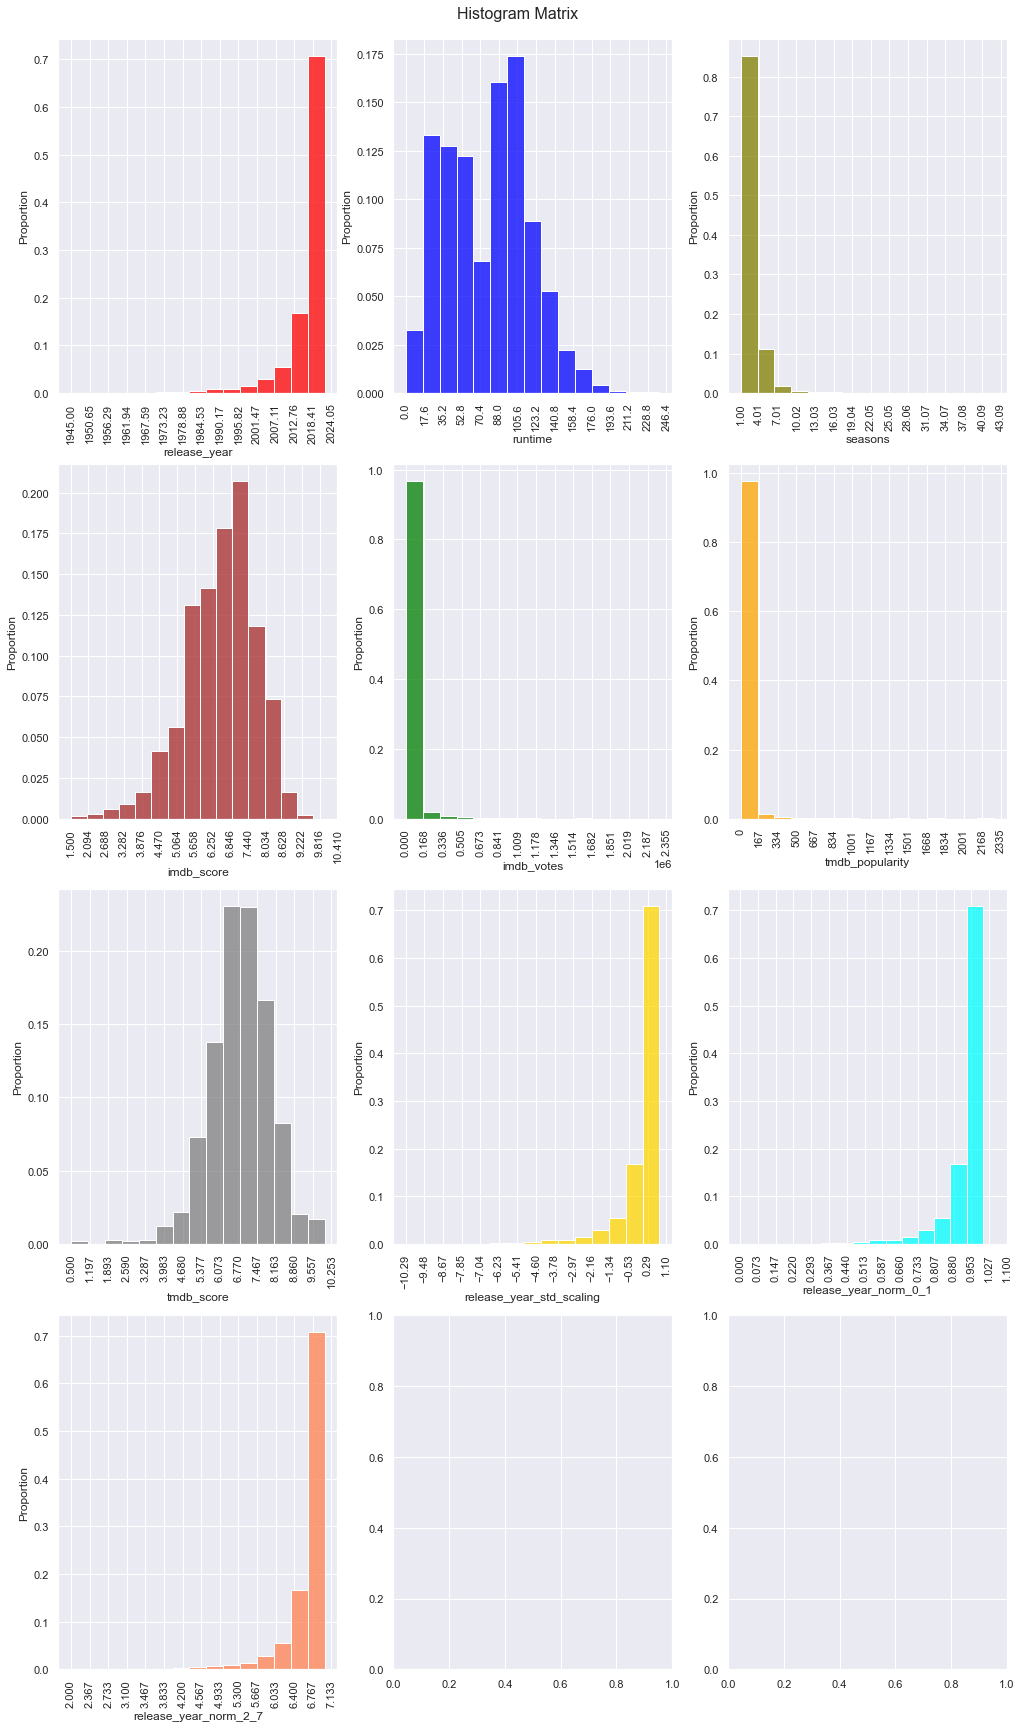

In [208]:
histogram_matrix(Data=Netflix_Data, bins=15, n=4, m=3, sep=15)

### Histogramas individuales

In [209]:
def histogram(Data, Variable_name, bins, color, figsize=(8,8)) :

    fig, axs = plt.subplots(figsize=figsize)

    p = sns.histplot(data=Data, x=Variable_name, stat="proportion", bins=bins, color=color)

    a = Data[Variable_name].min()
    b = Data[Variable_name].max()

    a = Data[Variable_name].min() - (b-a)/10
    b = Data[Variable_name].max() + (b-a)/10

    p.set_xticks(np.arange( a, b, (b-a)/10 ) )

    plt.setp(p.get_xticklabels(), rotation=90)

    plt.title(label = 'Histogram'+' '+ Variable_name , fontsize = 15)

    plt.show() 

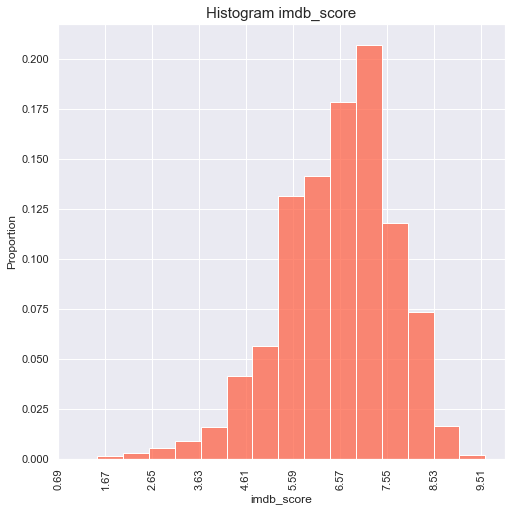

In [210]:
histogram(Data=Netflix_Data, Variable_name='imdb_score', bins=15, color='tomato') 

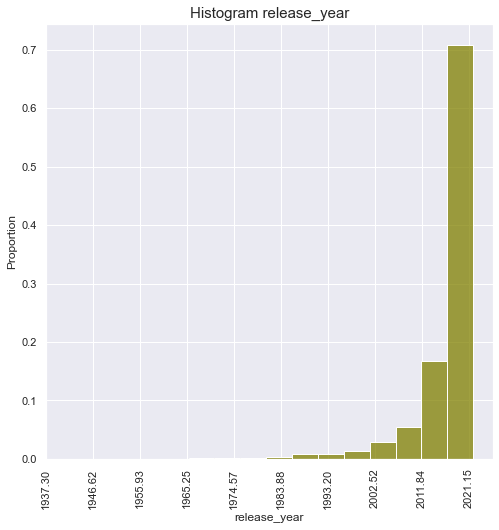

In [211]:
histogram(Data=Netflix_Data, Variable_name='release_year', bins=15, color='olive', figsize=(8,8)) 

### Boxplot Matrix

In [212]:
def boxplot_matrix(Data, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Boxplot Matrix', save=False, file_name='p', sep=10) :

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)


    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'steelblue', 'chocolate', 'goldenrod', 'green', 'orange', 'grey', 'violet', 'cyan', 'coral', 'darkred']
    
    colors2 = ['brown', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'olive', 'yellow', 'gold']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'blue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.boxplot(data=Data, x=i, color=c, ax=j)

        a = Data[i].min()
        b = Data[i].max()

        b = Data[i].max() + (b-a)/sep

        p.set_xticks(np.arange( a, b, (b-a)/sep ) )

        plt.setp(p.get_xticklabels(), rotation=90)

    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

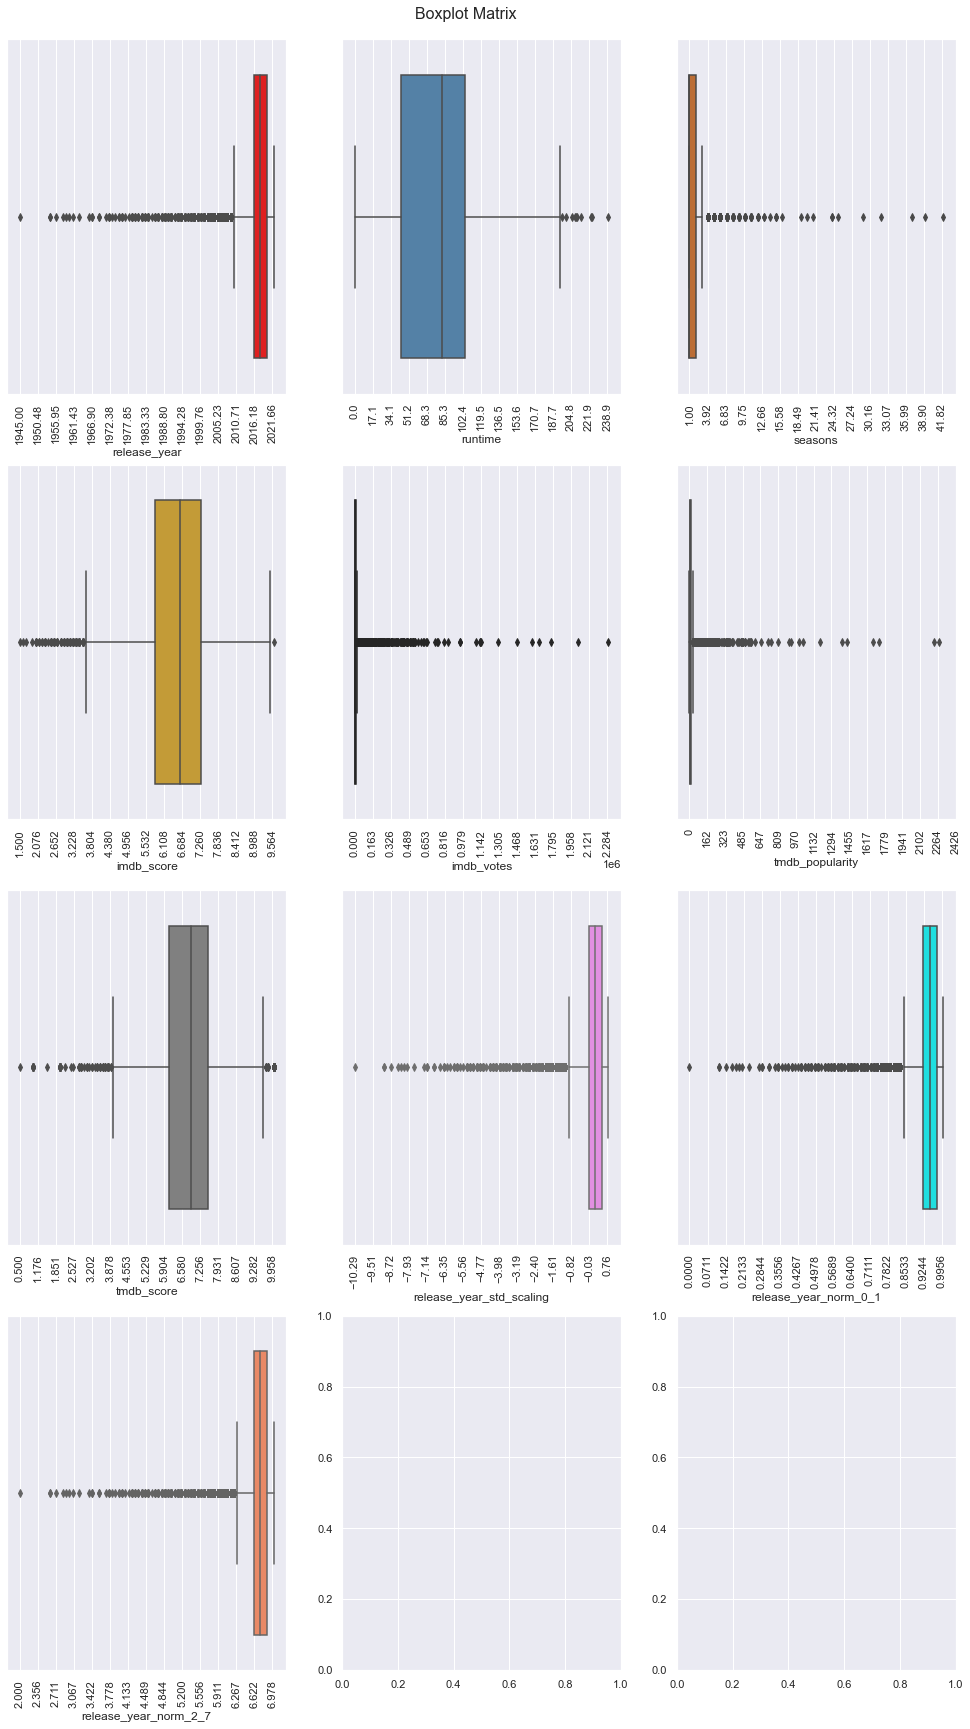

In [213]:
boxplot_matrix(Data=Netflix_Data, n=4, m=3, sep=15)

### Boxplots individuales

In [214]:
def boxplot(Data, Variable_name, color, figsize=(8,8), sep=10) :

    fig, axs = plt.subplots(figsize=figsize)

    p = sns.boxplot(data=Data, x=Variable_name, color=color)

    a = Data[Variable_name].min()
    b = Data[Variable_name].max()

    a = Data[Variable_name].min() - (b-a)/sep
    b = Data[Variable_name].max() + (b-a)/sep

    p.set_xticks(np.arange( a, b, (b-a)/sep ) )

    plt.setp(p.get_xticklabels(), rotation=90)

    plt.title(label = 'Histogram'+' '+ Variable_name , fontsize = 15)

    plt.show() 

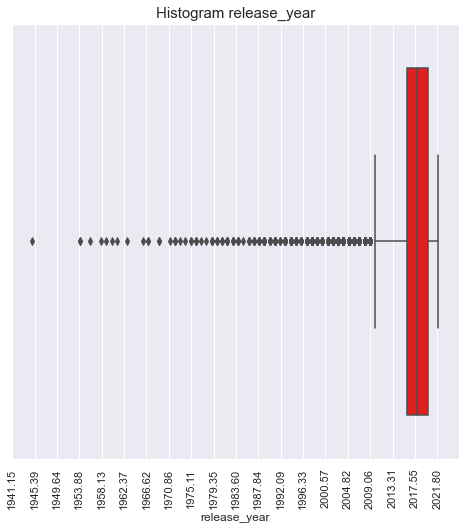

In [215]:
boxplot(Data=Netflix_Data, Variable_name='release_year', color='red', sep=20) 

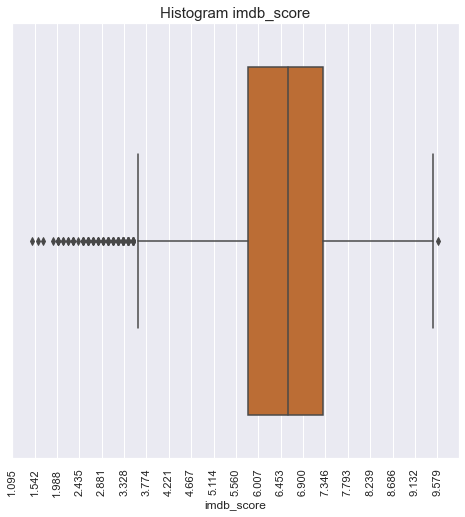

In [216]:
boxplot(Data=Netflix_Data, Variable_name='imdb_score', color='chocolate', sep=20) 

In [217]:
def ecdfplot_matrix(Data, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Ecdfplot Matrix', save=False, file_name='p', sep=10) :

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)


    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'steelblue', 'chocolate', 'goldenrod', 'green', 'orange', 'grey', 'violet', 'cyan', 'coral', 'darkred']
    
    colors2 = ['brown', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'olive', 'yellow', 'gold']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'blue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.ecdfplot(data=Data, x=i, color=c, ax=j)

        a = Data[i].min()
        b = Data[i].max()

        b = Data[i].max() + (b-a)/sep

        p.set_xticks(np.arange( a, b, (b-a)/sep ) )

        plt.setp(p.get_xticklabels(), rotation=90)

    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

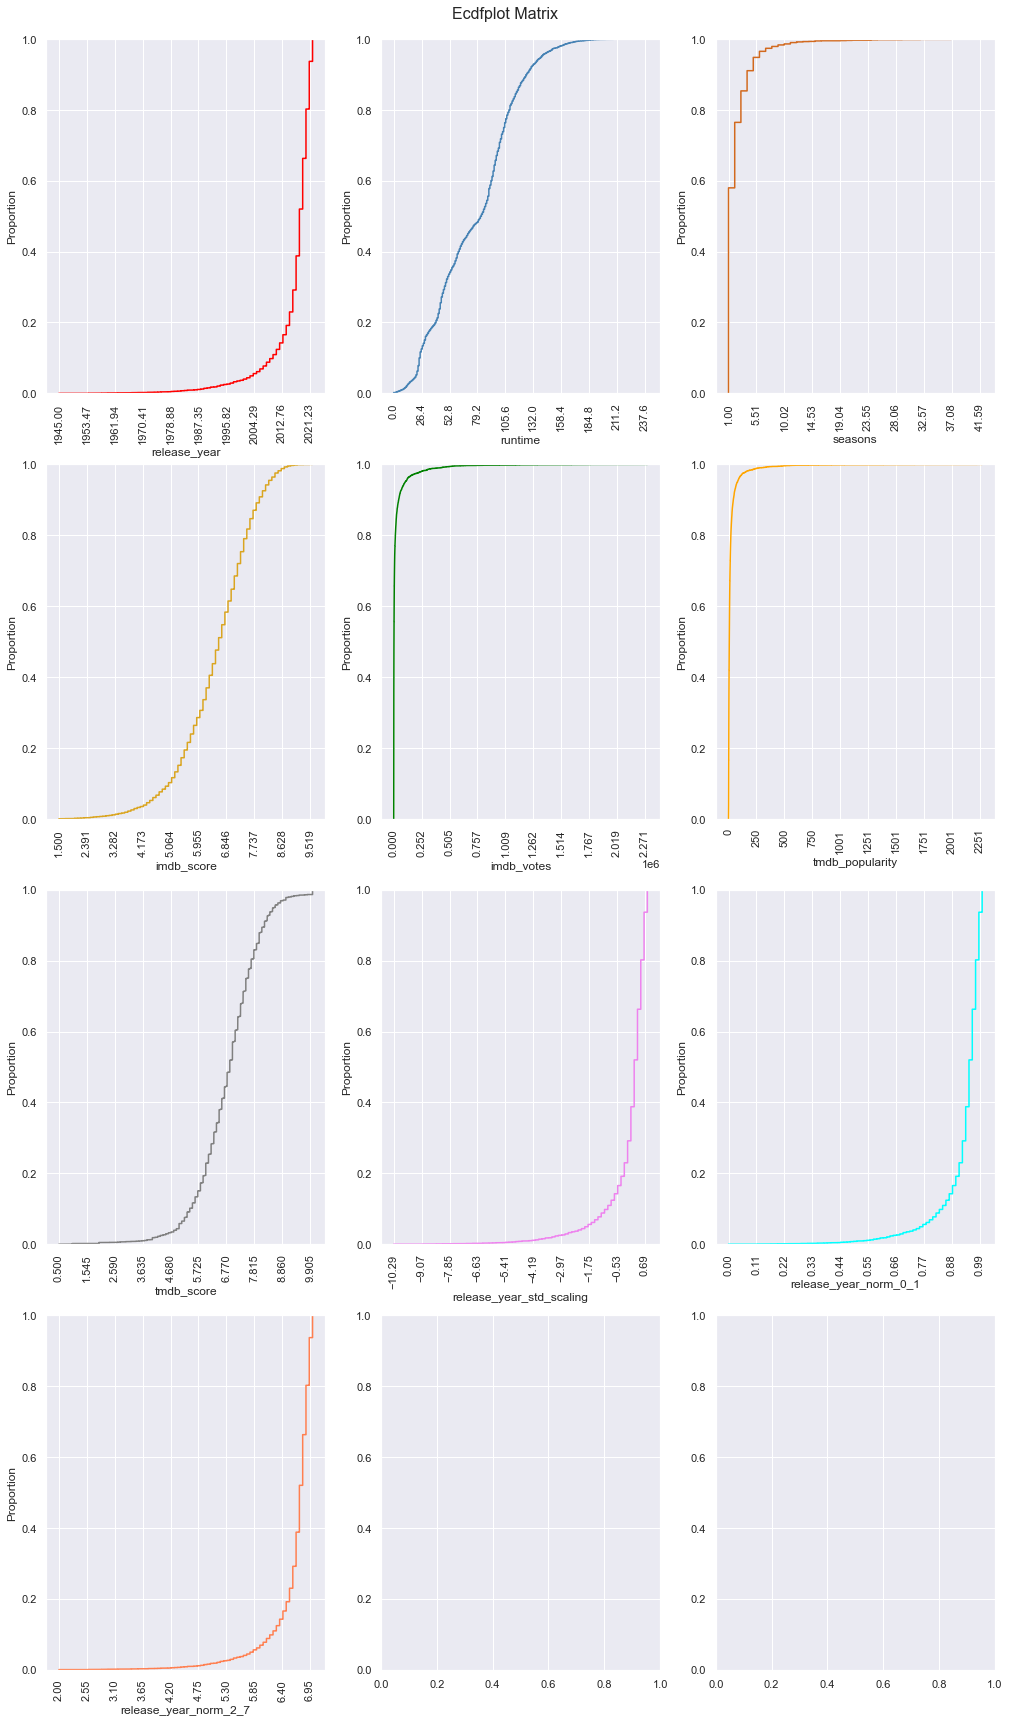

In [218]:
ecdfplot_matrix(Data=Netflix_Data, n=4, m=3)

### Ecdf individual

In [219]:
def ecdfplot(Data, Variable_name, color, figsize=(8,8), sep=10) :

    fig, axs = plt.subplots(figsize=figsize)

    p = sns.ecdfplot(data=Data, x=Variable_name, color=color)

    a = Data[Variable_name].min()
    b = Data[Variable_name].max()

    a = Data[Variable_name].min() - (b-a)/sep
    b = Data[Variable_name].max() + (b-a)/sep

    p.set_xticks(np.arange( a, b, (b-a)/sep ) )

    plt.setp(p.get_xticklabels(), rotation=90)

    plt.title(label = 'Histogram'+' '+ Variable_name , fontsize = 15)

    plt.show() 

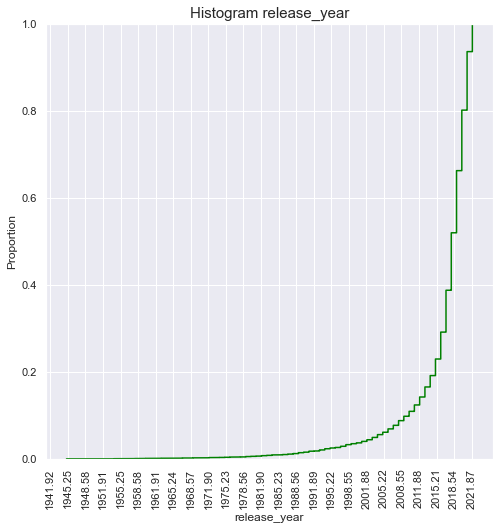

In [220]:
ecdfplot(Data=Netflix_Data, Variable_name='release_year', color='green', figsize=(8,8), sep=25)

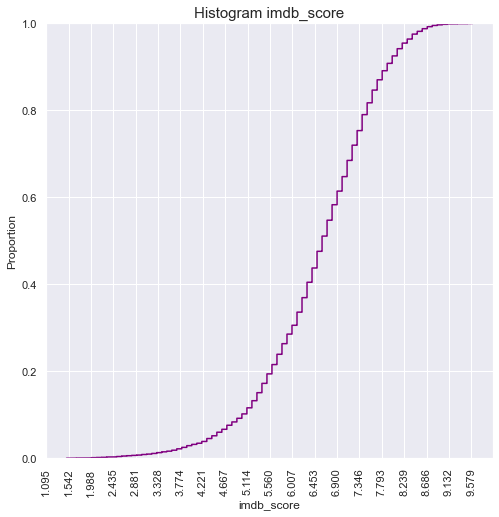

In [221]:
ecdfplot(Data=Netflix_Data, Variable_name='imdb_score', color='purple', figsize=(8,8), sep=20)

## Analisis con  variables cuantitativas recortadas (trimmed)

In [222]:
def outlier_detection(Data, Variable_name) :

    Q1 = Data[Variable_name].quantile(q=0.25)
    Q3 = Data[Variable_name].quantile(q=0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR

    lower_bound = Q1 - 1.5*IQR

    Variable_without_outliers = Data.loc[ ( Data[Variable_name] >= lower_bound ) &  ( Data[Variable_name] <= upper_bound ) , Variable_name ]

    Outliers = Data.loc[ ( Data[Variable_name] < lower_bound ) | ( Data[Variable_name] > upper_bound ) , Variable_name ]

    return Variable_without_outliers , Outliers

In [223]:
def Trimm_quantitative_variables(Data):

    colnames_quantitatives = (Data.dtypes[ (Data.dtypes == 'int64') | (Data.dtypes == 'float64') ]).index

    df = pd.DataFrame()

    for i in colnames_quantitatives :

        Variable_without_outliers , Outliers = outlier_detection(Data, Variable_name=i)
        
        df = pd.concat([df,Variable_without_outliers], axis=1)

    df.columns = [i+'_trimmed' for i in colnames_quantitatives]
     
    return df

In [224]:
Trimm_quantitative_variables(Netflix_Data)

,release_year_trimmed,runtime_trimmed,seasons_trimmed,imdb_score_trimmed,imdb_votes_trimmed,tmdb_popularity_trimmed,tmdb_score_trimmed,release_year_std_scaling_trimmed,release_year_norm_0_1_trimmed,release_year_norm_2_7_trimmed
218,2010.0,46.0,NaN,8.2,NaN,NaN,8.100,-0.925035,0.844156,NaN
222,2010.0,57.0,NaN,8.6,9856.0,5.581000,7.700,-0.925035,0.844156,NaN
224,2010.0,58.0,NaN,8.5,NaN,NaN,8.100,-0.925035,0.844156,NaN
237,2010.0,148.0,NaN,8.8,NaN,NaN,8.400,-0.925035,0.844156,NaN
241,2010.0,103.0,NaN,6.8,NaN,NaN,6.929,-0.925035,0.844156,NaN
...,...,...,...,...,...,...,...,...,...,...
406,NaN,NaN,NaN,7.4,NaN,13.699000,7.900,NaN,NaN,NaN
412,NaN,NaN,NaN,7.5,NaN,11.959000,7.400,NaN,NaN,NaN
438,NaN,NaN,NaN,8.7,324.0,2.821000,6.500,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,4.147341,NaN,NaN,NaN,NaN


In [225]:
release_year_without_outliers , release_year_Outliers = outlier_detection(Netflix_Data, 'release_year')

In [226]:
seasons_without_outliers , seasons_Outliers = outlier_detection(Netflix_Data, 'seasons')

In [227]:
(release_year_Outliers == 2018).sum()

0

In [228]:
(release_year_without_outliers ==2017).sum()

563

In [229]:
seasons_without_outliers

0       1.0
26      1.0
83      1.0
103     1.0
107     1.0
       ... 
5828    1.0
5830    1.0
5831    1.0
5833    1.0
5849    1.0
Name: seasons, Length: 1797, dtype: float64

In [230]:
Trimm_quantitative_variables(Netflix_Data).loc[0,:]

release_year_trimmed                 NaN
runtime_trimmed                     51.0
seasons_trimmed                      1.0
imdb_score_trimmed                   NaN
imdb_votes_trimmed                   NaN
tmdb_popularity_trimmed              0.6
tmdb_score_trimmed                   NaN
release_year_std_scaling_trimmed     NaN
release_year_norm_0_1_trimmed        NaN
release_year_norm_2_7_trimmed        NaN
Name: 0, dtype: float64

In [231]:
Trimm_quantitative_variables(Netflix_Data).loc[218,:]

release_year_trimmed                2010.000000
runtime_trimmed                       46.000000
seasons_trimmed                             NaN
imdb_score_trimmed                     8.200000
imdb_votes_trimmed                          NaN
tmdb_popularity_trimmed                     NaN
tmdb_score_trimmed                     8.100000
release_year_std_scaling_trimmed      -0.925035
release_year_norm_0_1_trimmed          0.844156
release_year_norm_2_7_trimmed               NaN
Name: 218, dtype: float64

In [232]:
def trimmed_histogram_matrix(Data, bins, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Trimmed Histogram Matrix', save=False, file_name='p', sep=10) :

    sns.set_theme()

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    Data_trimmed = Trimm_quantitative_variables(Data)

    colnames_quantitatives = Data_trimmed.columns

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)
    

    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'blue', 'olive', 'brown', 'green', 'orange', 'grey', 'gold', 'cyan', 'coral', 'darkred']
    
    colors2 = ['goldenrod', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'chocolate', 'yellow', 'violet']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'steelblue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.histplot(data=Data_trimmed, x=i, stat="proportion", bins=bins, color=c, ax=j)

        a = Data_trimmed[i].min()
        b = Data_trimmed[i].max()

        b = Data_trimmed[i].max() + (b-a)/sep

        p.set_xticks(np.arange( a, b, (b-a)/sep) )

        plt.setp(p.get_xticklabels(), rotation=90)


    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

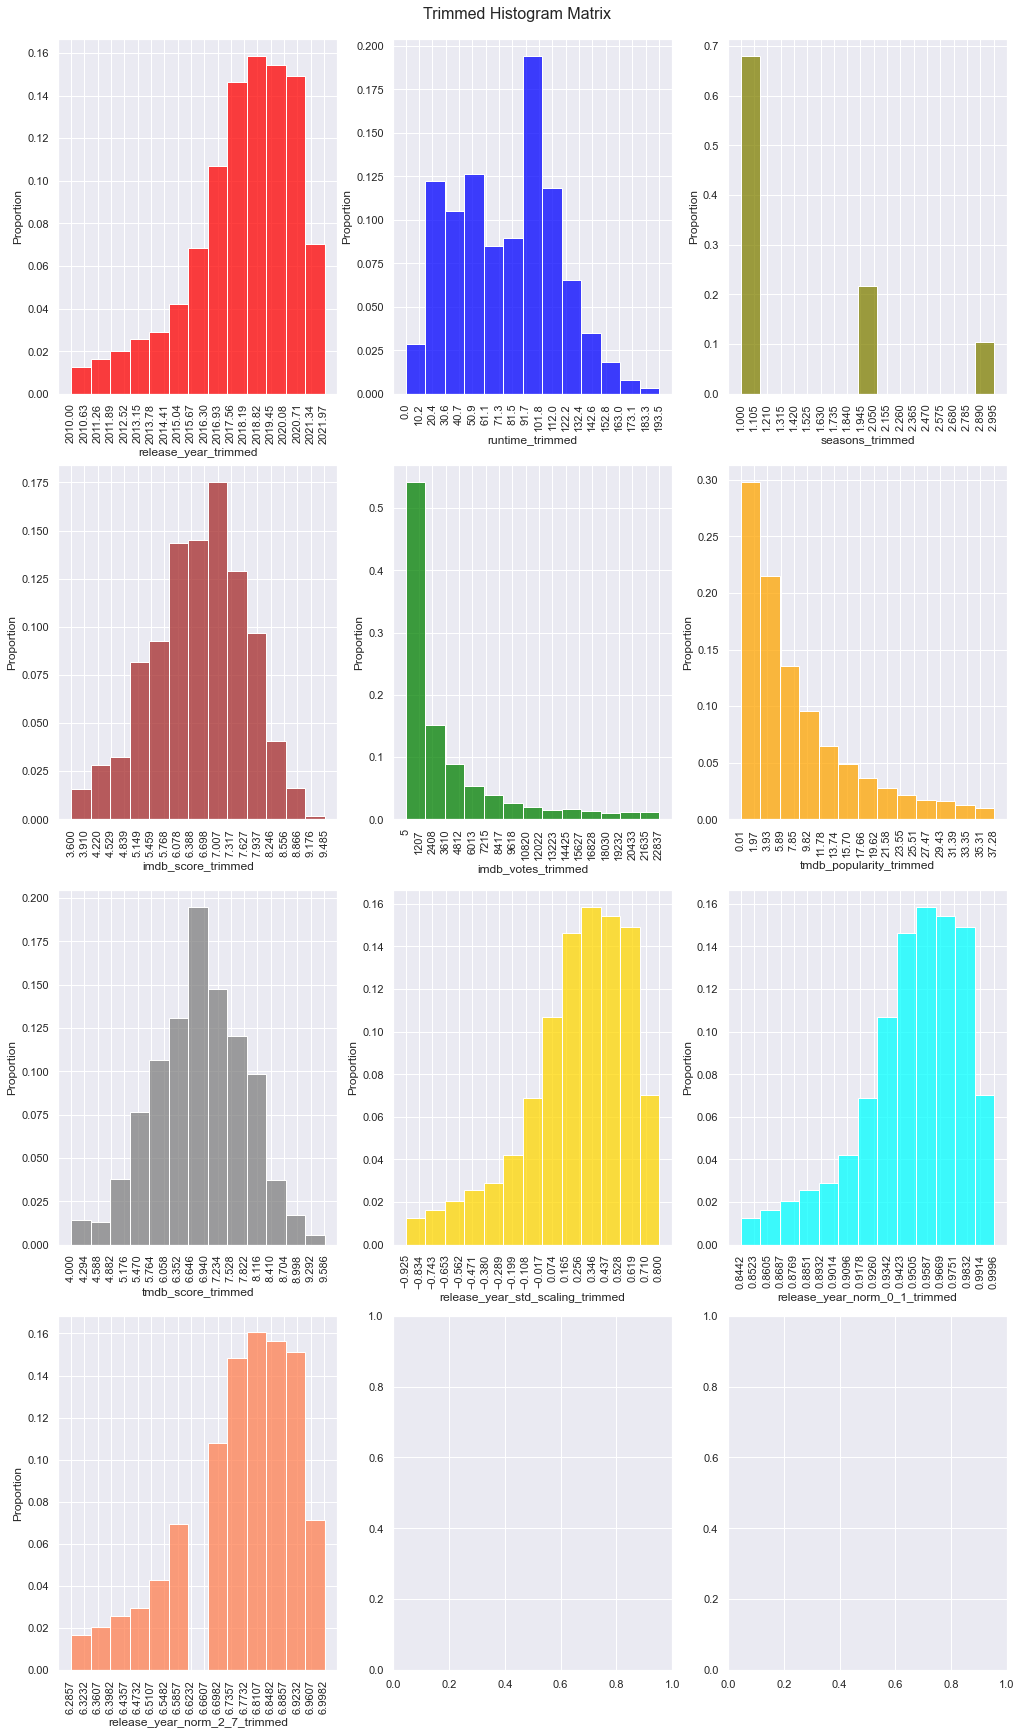

In [233]:
trimmed_histogram_matrix(Data=Netflix_Data, bins=13, n=4, m=3, sep=20)

In [234]:
def trimmed_boxplot_matrix(Data, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Trimmed Bloxpot Matrix', save=False, file_name='p', sep=10) :

    sns.set_theme()

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    Data_trimmed = Trimm_quantitative_variables(Data)

    colnames_quantitatives = Data_trimmed.columns

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)


    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'blue', 'olive', 'brown', 'green', 'orange', 'grey', 'gold', 'cyan', 'coral', 'darkred']
    
    colors2 = ['goldenrod', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'chocolate', 'yellow', 'violet']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'steelblue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.boxplot(data=Data_trimmed, x=i, color=c, ax=j)

        a = Data_trimmed[i].min()
        b = Data_trimmed[i].max()

        b = Data_trimmed[i].max() + (b-a)/sep

        p.set_xticks(np.arange( a, b, (b-a)/sep) )

        plt.setp(p.get_xticklabels(), rotation=90)


    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

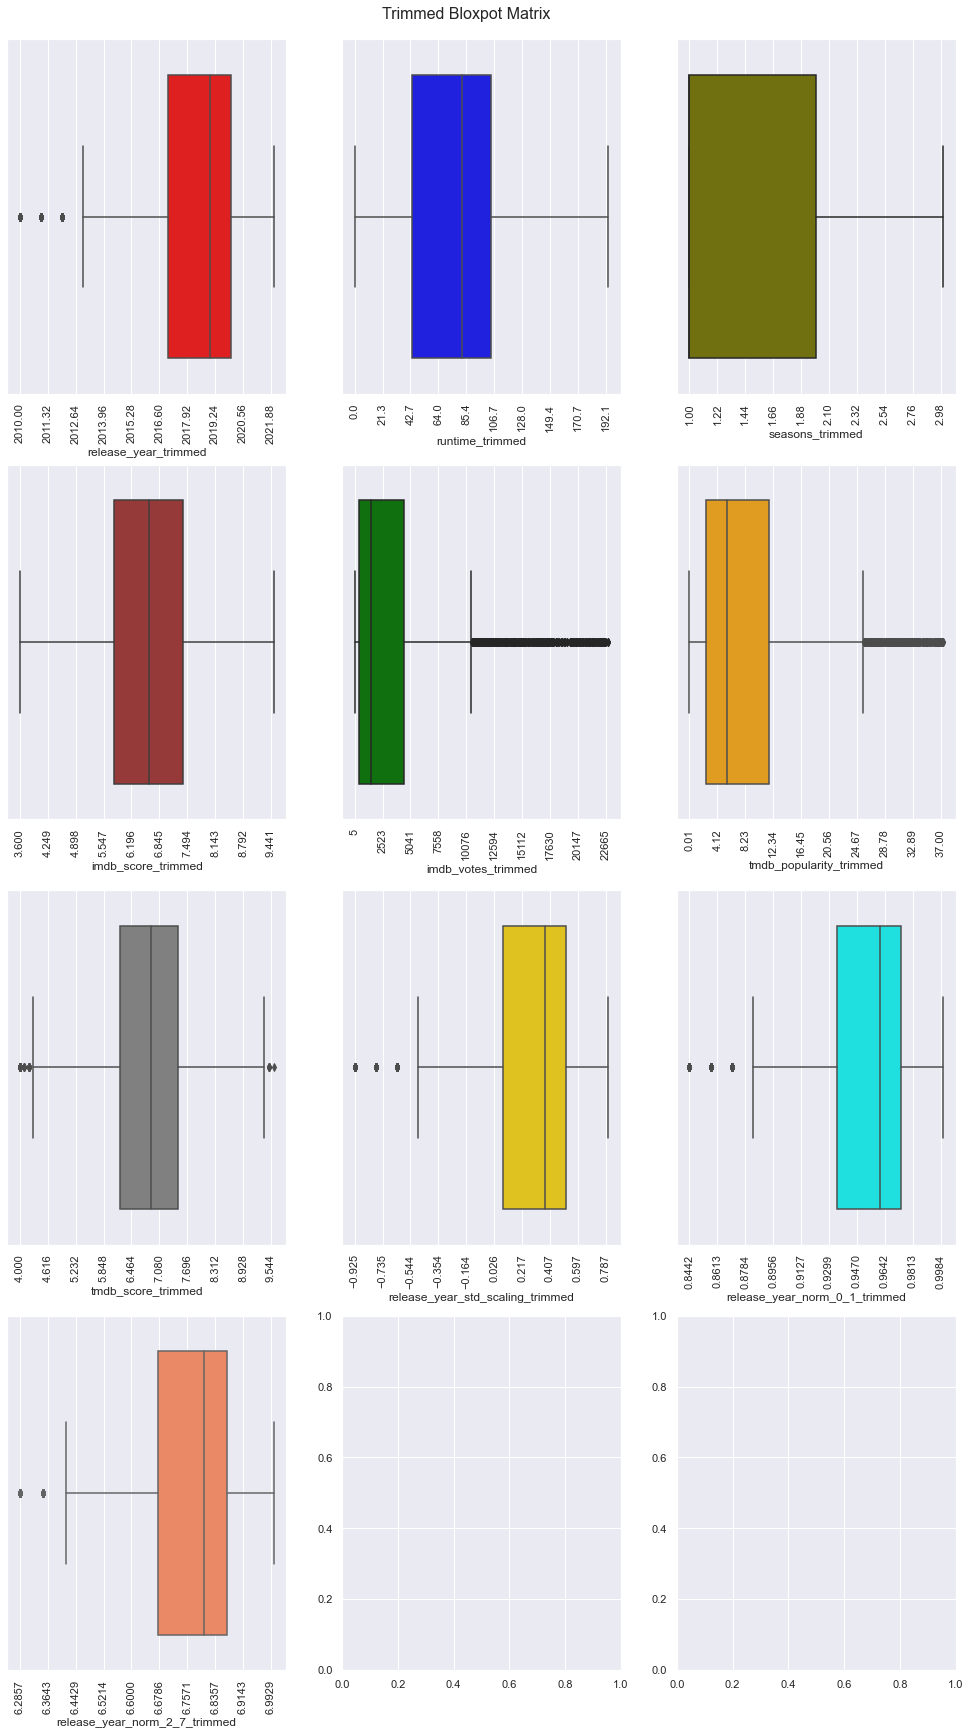

In [235]:
trimmed_boxplot_matrix(Data=Netflix_Data, n=4, m=3)

In [236]:
def trimmed_ecdfplot_matrix(Data, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Trimmed Ecdfplot Matrix', save=False, file_name='p', sep=10) :

    sns.set_theme()

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    Data_trimmed = Trimm_quantitative_variables(Data)

    colnames_quantitatives = Data_trimmed.columns

    colnames_quantitatives = list(colnames_categorical)

    for r in remove_columns :

        colnames_quantitatives.remove(r)

    for r in add_columns :

        colnames_quantitatives.append(r)

    
    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'blue', 'olive', 'brown', 'green', 'orange', 'grey', 'gold', 'cyan', 'coral', 'darkred']
    
    colors2 = ['goldenrod', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'chocolate', 'yellow', 'violet']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'steelblue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_quantitatives, axs_list, colors) :
 
        p = sns.ecdfplot(data=Data_trimmed, x=i, color=c, ax=j)

        a = Data_trimmed[i].min()
        b = Data_trimmed[i].max()

        b = Data_trimmed[i].max() + (b-a)/sep

        p.set_xticks(np.arange( a, b, (b-a)/sep) )

        plt.setp(p.get_xticklabels(), rotation=90)


    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

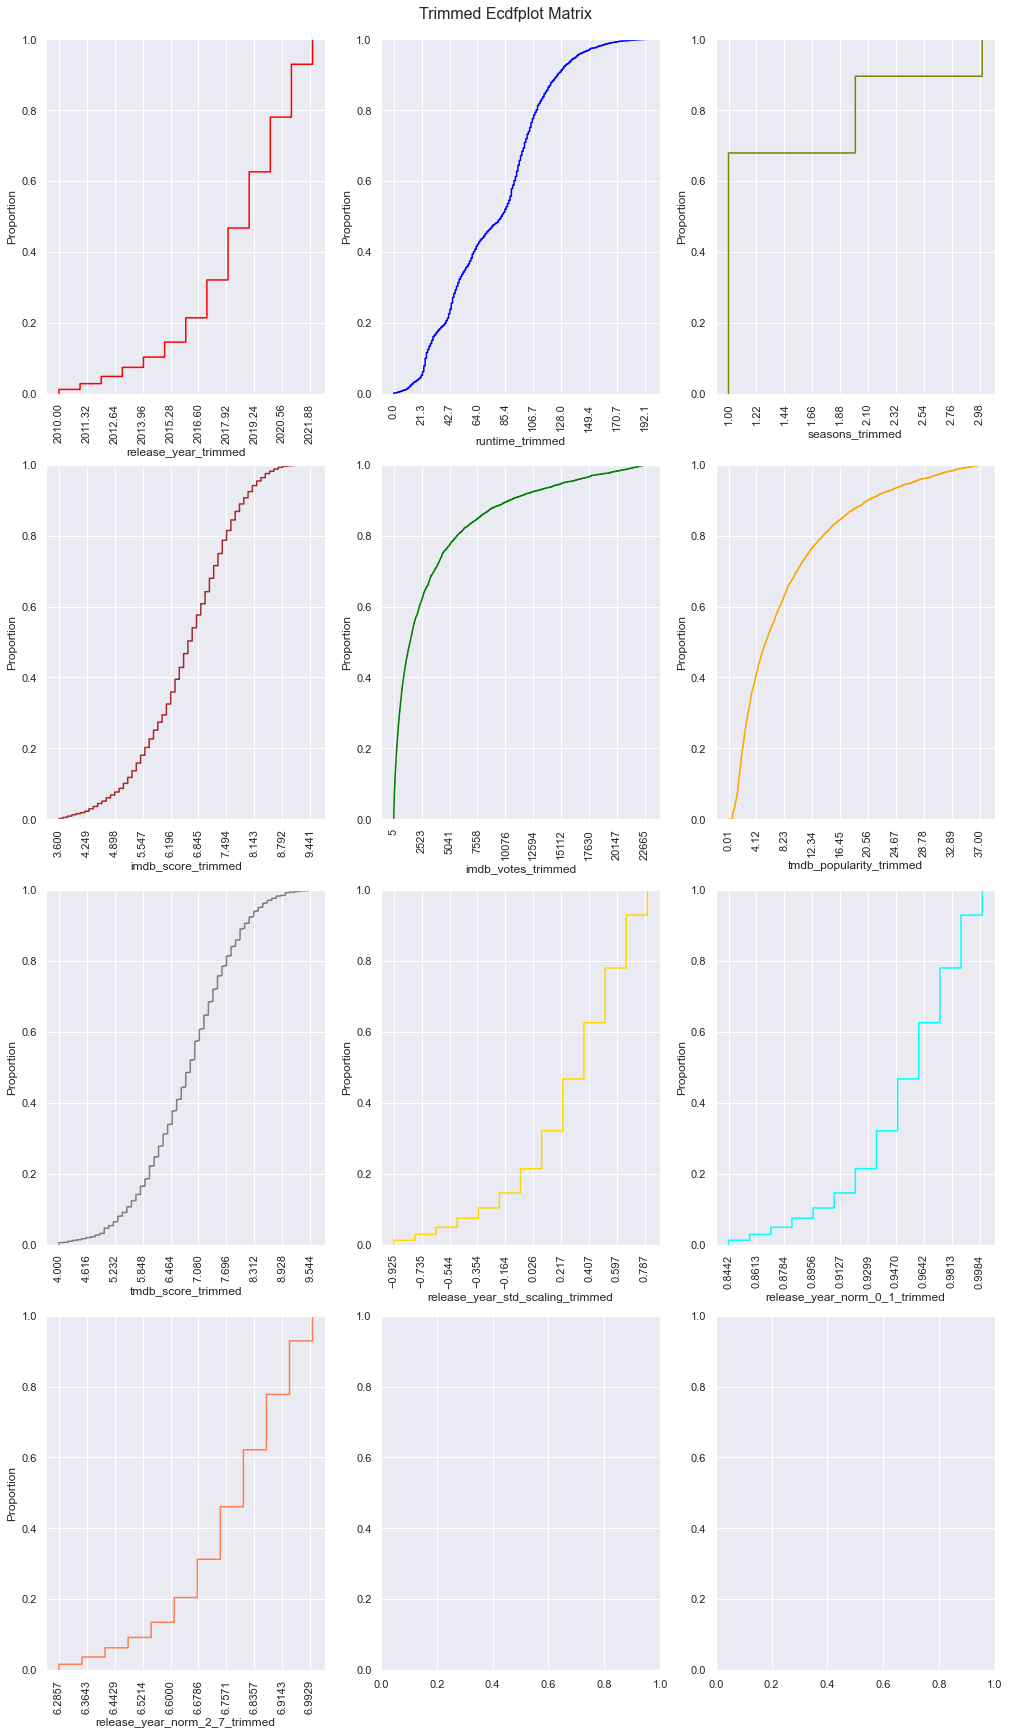

In [237]:
trimmed_ecdfplot_matrix(Data=Netflix_Data, n=4, m=3)

## Análisis gráfico variables categoricas

In [285]:
def barplot_matrix(Data, n, m, remove_columns= [], add_columns = [], figsize=(17,30), title='Barplot Matrix', save=False, file_name='p', sep=10) :

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    colnames_categorical = (Data.dtypes[ (Data.dtypes == 'object') | (Data.dtypes == 'category') ]).index

    colnames_categorical = list(colnames_categorical)

    for r in remove_columns :

        colnames_categorical.remove(r)

    for r in add_columns :

        colnames_categorical.append(r)

    
    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'steelblue', 'chocolate', 'goldenrod', 'green', 'orange', 'grey', 'violet', 'cyan', 'coral', 'darkred']
    
    colors2 = ['brown', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'olive', 'yellow', 'gold']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'blue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    for i, j, c in zip(colnames_categorical, axs_list, colors) :
 
        # p = sns.countplot(data=Data, x=i, color=c, ax=j)

        value_counts = Data[i].value_counts(normalize=True)
        p = value_counts.plot(kind='bar', color=c, ax=j)
        j.set_ylabel("Proportion")
        j.set_xlabel(i)

        plt.setp(p.get_xticklabels(), rotation=0)
   
    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

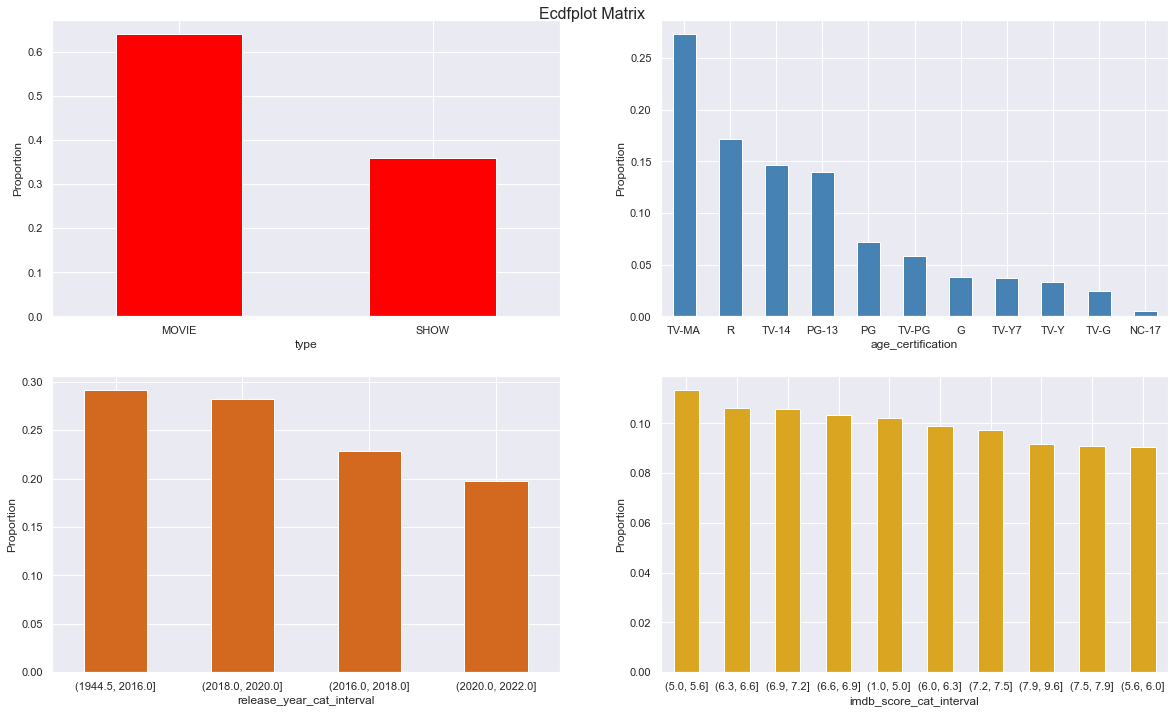

In [284]:
barplot_matrix(Data=Netflix_Data, n=2, m=2, figsize=(20,12), remove_columns=['id', 'title', 'imdb_id', 'genres', 'description', 'production_countries', 'type_recode', 'age_certification_recode', 'release_year_cat','imdb_score_cat'])

## Analisis gráfico de cruces de variables:



### cuantis - cuantis  (dispersion)


In [315]:
def scatter_matrix(Data, n, m, remove_columns=[], add_columns=[], figsize=(17,30), title='Barplot Matrix', save=False, file_name='p', sep=10) :

    if (n > 5) & (m > 5) : print('It cannot be n > 5 and m > 5')

    colnames_quantitative = (Data.dtypes[ (Data.dtypes == 'float64') | (Data.dtypes == 'int64') ]).index

    colnames_quantitative = list(colnames_quantitative)

    for r in remove_columns :

        colnames_quantitative.remove(r)

    for r in add_columns :

        colnames_quantitative.append(r)

    
    fig, axs = plt.subplots(n, m, figsize=figsize)

    colors1 = ['red', 'steelblue', 'chocolate', 'goldenrod', 'green', 'orange', 'grey', 'violet', 'cyan', 'coral', 'darkred']
    
    colors2 = ['brown', 'pink', 'deepskyblue', 'lime', 'magenta', 'indigo', 'olive', 'yellow', 'gold']

    colors3 = ['tan', 'crimson', 'black', 'tomato', 'blue']

    colors = colors1 + colors2 + colors3

    axs_list = [ axs[i,j]  for i in range(0,n) for j in range(0,m) ]

    combi_colnames = list( set( itertools.combinations(colnames_quantitative, 2) ) )

    for i, j, c in zip(range(0, len(combi_colnames)), axs_list, colors) :

        p = sns.scatterplot(data=Data, x=combi_colnames[i][0], y=combi_colnames[i][1] , color=c, ax=j)

        #a = Data[combi_colnames[i][0]].min()
        #b = Data[combi_colnames[i][1]].max()

        #b = Data[combi_colnames[i][1]].max() + (b-a)/sep

        #p.set_xticks(np.arange( a, b, (b-a)/sep) )

        #plt.setp(p.get_xticklabels(), rotation=90)
   
    if save == True : fig.savefig(file_name+'.jpg', format='jpg', dpi=300)

    plt.suptitle(title, fontsize=16, y=0.895)

    plt.show()  

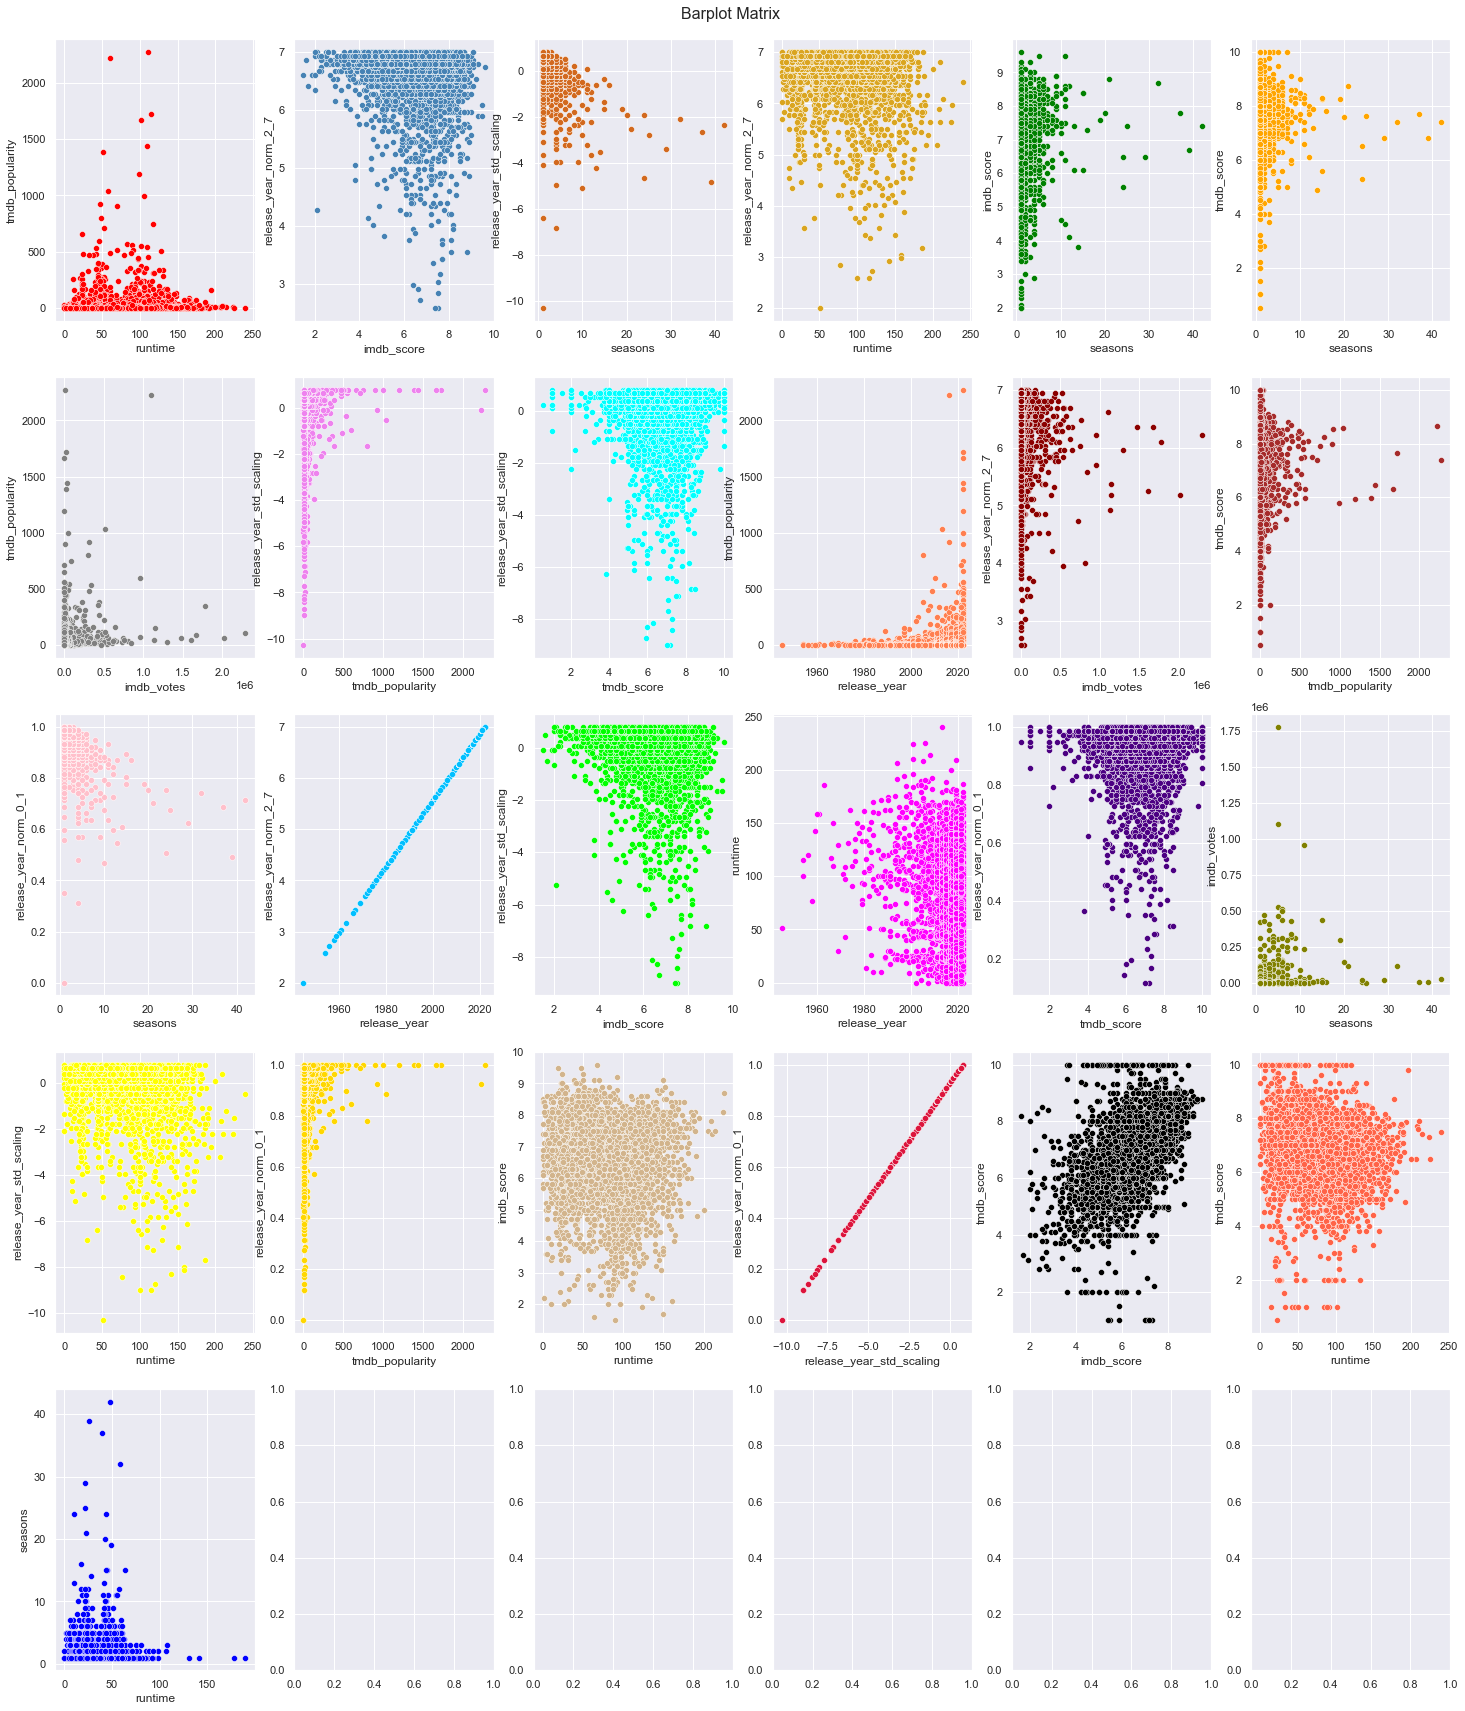

In [321]:
scatter_matrix(Data=Netflix_Data, n=5, m=6, figsize=(25,30))

In [291]:
import itertools

In [304]:
a = list( set( itertools.combinations(colnames_categorical, 2) ) )

In [305]:
for k in range(0, len(a)):

    print(a[k][0])

type
age_certification
type
release_year_cat
description
description
production_countries
genres
title
description
age_certification
age_certification
type
age_certification
type
title
title
imdb_id
title
genres
genres
imdb_id
production_countries
production_countries
genres
age_certification_recode
production_countries
type_recode
title
description
type
title
release_year_cat
type_recode
description
description
release_year_cat_interval
type
imdb_id
type
age_certification
release_year_cat_interval
genres
title
title
imdb_score_cat_interval
description
imdb_id
type
type_recode
age_certification
age_certification
age_certification_recode
production_countries
description
title
title
type
type_recode
imdb_id
age_certification
genres
production_countries
title
type
description
imdb_id
type_recode
age_certification
age_certification_recode
genres
release_year_cat_interval
genres
description
production_countries
age_certification_recode
type
title


In [301]:
a = list(a)

In [303]:
a[0]

('type', 'release_year_cat')

In [296]:
a[0][0]

'title'

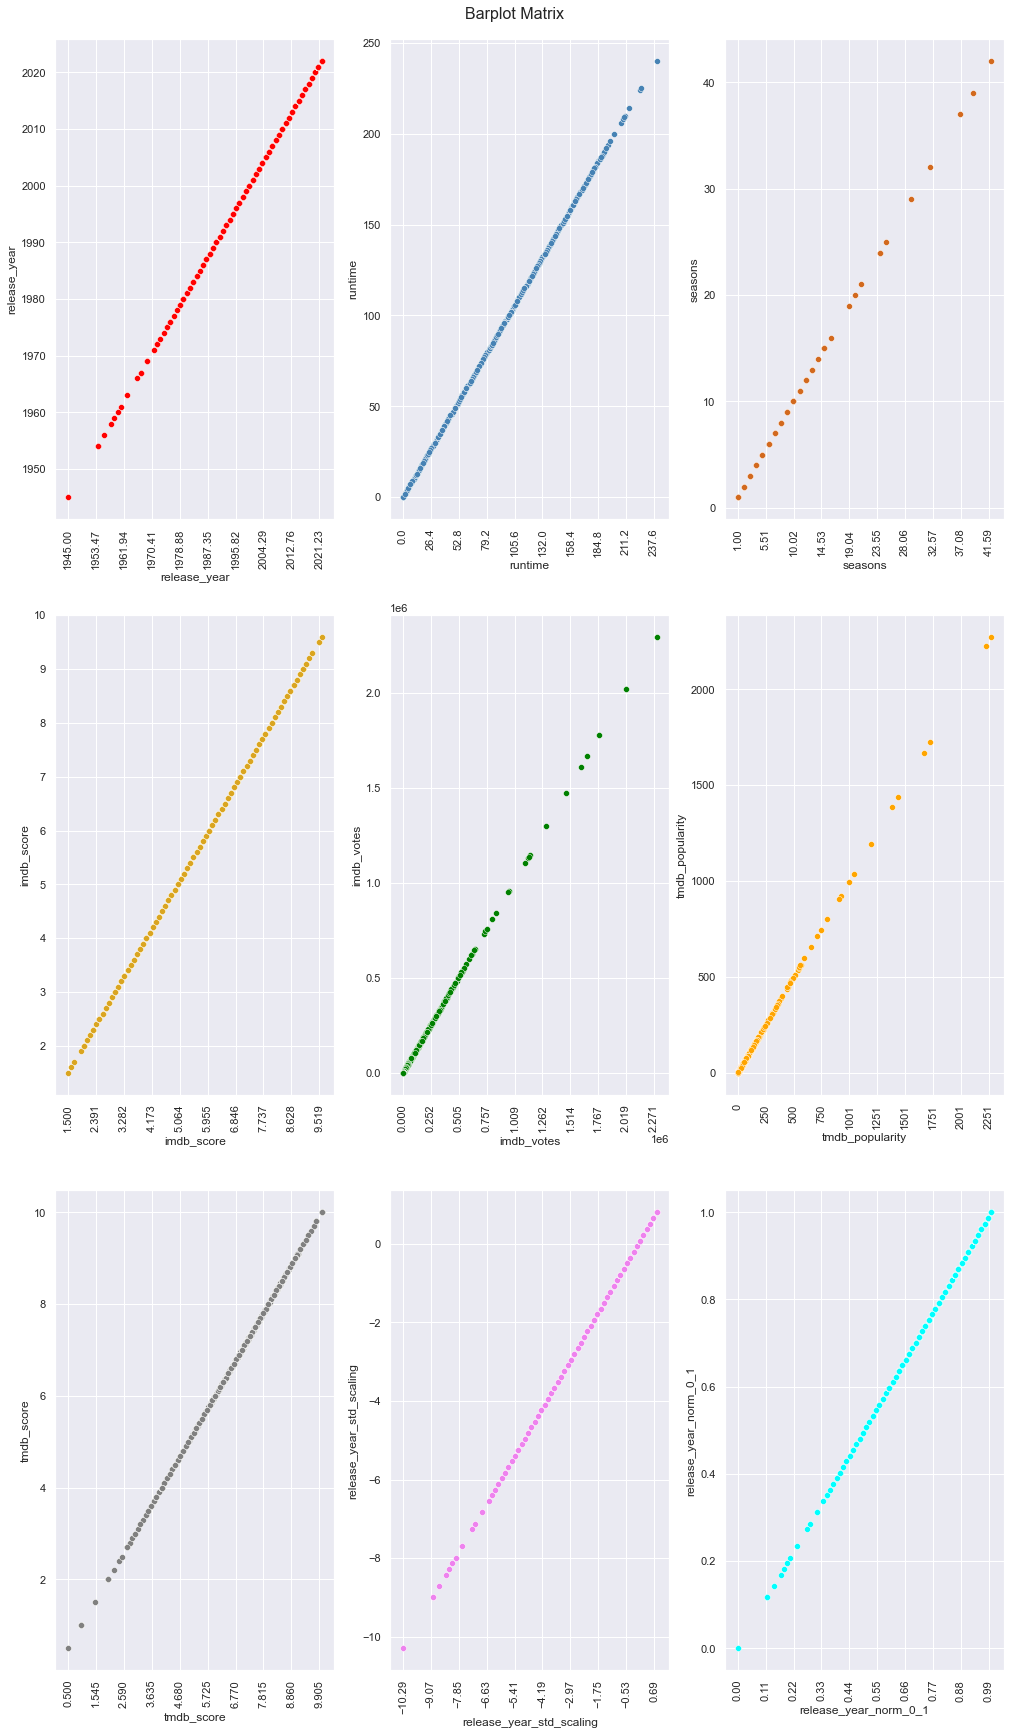

In [290]:
scatter_matrix(Data=Netflix_Data, n=3, m=3)


cate-cate



cuanti-cate

type, age_certification , genres, production_countries

In [ ]:
Netflix_Data.type.unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [ ]:
proportion_Movie = len( Netflix_Data.loc[ Netflix_Data['type']=='MOVIE' , :] ) / len(Netflix_Data)
proportion_Show = len( Netflix_Data.loc[ Netflix_Data['type']=='SHOW' , :] ) / len(Netflix_Data)

In [ ]:
Netflix_Data['proportion_type'] = 0


for i in range(0, len(Netflix_Data)):

    if Netflix_Data['type'][i] == 'MOVIE' :

        Netflix_Data['proportion_type'][i] = proportion_Movie

    else :

        Netflix_Data['proportion_type'][i] = proportion_Show

C:\Users\Usuario\AppData\Local\Temp\ipykernel_22132\397022058.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_Data['proportion_type'][i] = proportion_Show


[Text(0.5, 0, 'type'), Text(0, 0.5, 'proportion')]

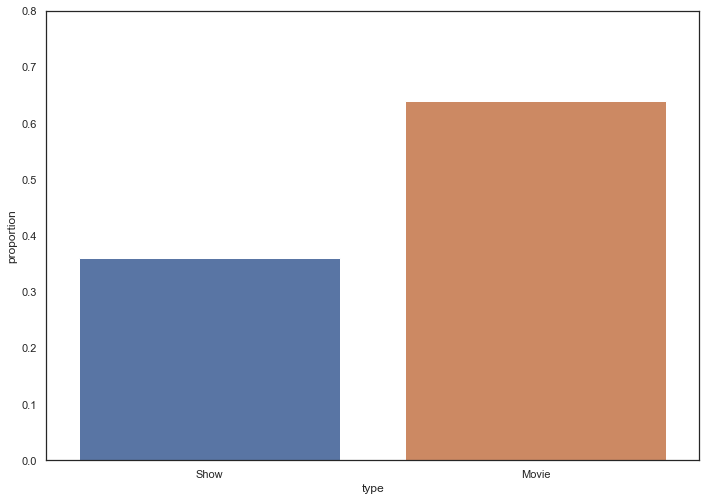

In [ ]:
p1 = sns.barplot(x='type', y='proportion_type', data=Netflix_Data) 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Show', 'Movie'])
p1.axes.set(xlabel='type', ylabel='proportion')

In [ ]:
[ proportion_Movie , proportion_Show ]

[0.64, 0.36]

[Text(0.5, 0, 'type'), Text(0, 0.5, 'count')]

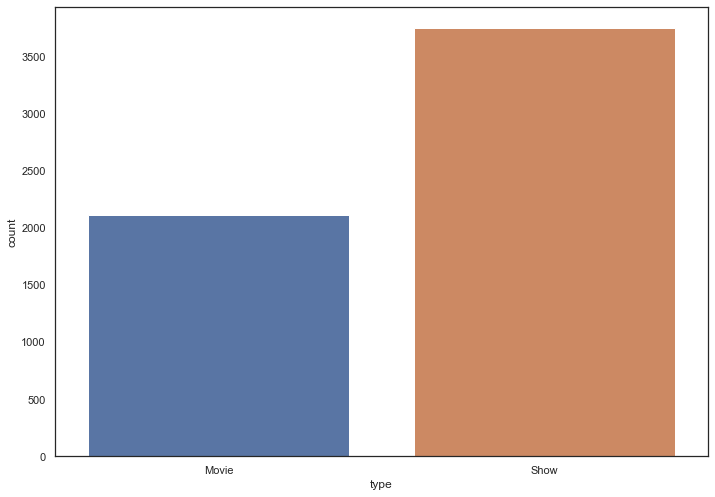

In [ ]:
p1 = sns.countplot(x='type', data=Netflix_Data) 
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count')

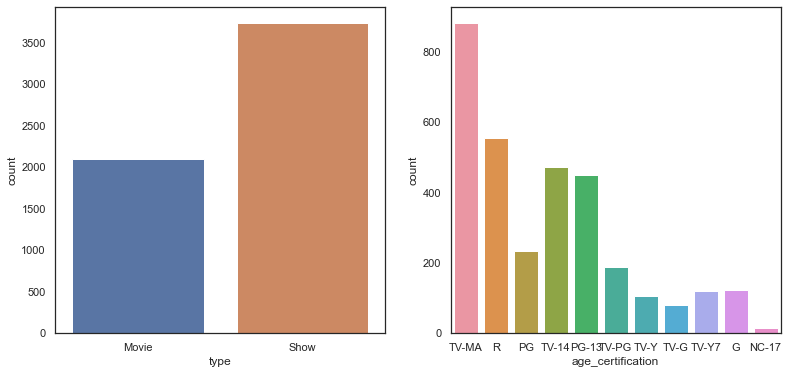

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))

p1 = sns.countplot(x='type', data=Netflix_Data, ax=axs[0]) 
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count')

p2 = sns.countplot(x='age_certification', data=Netflix_Data, ax=axs[1]) 


fig.savefig('p4.png', format='png', dpi=1200)

plt.show()

# ANALISIS DETALLADO

In [ ]:
import numpy as np

In [ ]:
mean = Netflix_Data['release_year'].mean()
sd = Netflix_Data['release_year'].std()
min = Netflix_Data['release_year'].min()
Q25 = Netflix_Data['release_year'].quantile(0.25)
Q50 = Netflix_Data['release_year'].quantile(0.5)
Q75 = Netflix_Data['release_year'].quantile(0.75)
max = Netflix_Data['release_year'].max()
Oulier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Oulier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['release_year'] < Oulier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['release_year'] > Oulier_upper_bound).sum()

prop_NA = Netflix_Data['release_year'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['release_year'] < Oulier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['release_year']))
prop_upper_outliers = (Netflix_Data['release_year'] > Oulier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['release_year']))

statistics_release_year = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Oulier_lower_bound':Oulier_lower_bound, 'Oulier_upper_bound':Oulier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Oulier_lower_bound', 'Oulier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['release_year'])

In [ ]:
statistics_release_year

,mean,sd,min,Q25,Q50,Q75,max,Oulier_lower_bound,Oulier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
release_year,2016.417094,6.937726,1945,2016.0,2018.0,2020.0,2022,2010.0,2026.0,574,0,0.09812,0.0,0.0,1.0


Teniendo en cuenta los datos disponibles sobre títulos de Netflix:

- El año de lanzamiento medio es el 2016.42

- El año de lanzamiento mediano (cuantil 50%) es el 2018. Por lo que el 50% de los titulos han sido lanzados posteriormente al 2018

- La media es menor que la mediana debido a la presencia de outliers inferiores, en concreto, casi el 10% de los datos de `release_year` son outliers inferiores. 

- El cuantil 25% es 2016 , por lo que el 75% de los titulos analizados (la gran mayoria) tienen un año de lanzamiento posterior al 2016. 

- El cuantil 75% es 2020, por lo que la gran mayoria de titulos analizados tienen una fecha de lanzamiento igual o anterior al 2020, solo es 25% de ellos fueron lanzados posteriormente al 2020.

- De los dos anteriores puntos se deduce que el 50% de los titulos analizados han sido lanzados entre 2016 y 2020.

- El año de lanzamiento mas antiguo registrado (mínimo) es 1945

- El año de lanzamiento mas reciente registrado (máximo) es 2022

- La cota inferior de outliers es 2010. Por lo que todo titulo con año de lanzamiento inferior al 2010 será considerado un outlier.

- La cota superior de outliers es 2026. Por lo que todo titulo con año de lanzamiento superior al 2026 será considerado un outlier.

- El número de outliers inferiores es 574 , y la proporción sobre el total de datos disponibles de la variable (sin contar NA's) es 0.098, es decir, hay casi un 10% de outliers inferiores. Como ya se comentó esto es lo que tira a media hacia la abajo y hace que sea menro que la mediana, ya que la media se ve mas afectada por los valores extremos (outliers) que la mediana.

- El número de outliers superiores es 0, es decir, no hay. Esto se puede comprobar rapidamente viendo que el valor maximo (2022) es inferior a la cota superior de outliers (2026).

- La proporcion de valores faltantes presente en la variable `release_year` es 0 , es decir, no NA's en los datos disponibles de esta variable.

Tabla de frecuencias relativas para `release_year`

In [ ]:
df_release_year = pd.DataFrame( Netflix_Data.groupby('release_year')['release_year'].count().reset_index(name='count') ) 

df_release_year['prop'] = df_release_year['count'] / len(Netflix_Data)

df_release_year['cum_prop'] = df_release_year['prop'].cumsum()

df_release_year.head(10)

,release_year,count,prop,cum_prop
0,1945,1,0.000171,0.000171
1,1954,2,0.000342,0.000513
2,1956,1,0.000171,0.000684
3,1958,1,0.000171,0.000855
4,1959,1,0.000171,0.001026
5,1960,1,0.000171,0.001197
6,1961,1,0.000171,0.001368
7,1963,1,0.000171,0.001538
8,1966,1,0.000171,0.001709
9,1967,2,0.000342,0.002051


In [ ]:
df_release_year.sort_values(by='prop' , ascending=False).head(10)

,release_year,count,prop,cum_prop
59,2019,836,0.142906,0.662906
60,2020,814,0.139145,0.802051
61,2021,787,0.134530,0.936581
58,2018,773,0.132137,0.520000
57,2017,563,0.096239,0.387863
62,2022,371,0.063419,1.000000
56,2016,362,0.061880,0.291624
55,2015,223,0.038120,0.229744
54,2014,153,0.026154,0.191624
53,2013,135,0.023077,0.165470


Con esta tabla puede verse exactemente los cuantiles de la variable `release_year`, ya que los obtenidos con la función `quantile()` son una aproximación.

- 2013 es el cuantil 0.165 , por lo que solo un 16.5% de los titulos fueron lanzados antes del 2014 (en 2013 o antes).

- 2016 es el cuantil 0.29 , ya que el 29% de los titulos tienen un año de lanzamiento igual o anterior al 2016. Por lo que el 61% de los titulos han sido lanzados posteiormente al año 2016.

- 2018 es el cuantil 0.52 , por lo que el 52% de los titulos tienen un año de lanzamiento igual o anterior al 2018. Y casi la mitad de los titulos (48%) han sido lanzados posteriormente al 2018.

- 2020 es el cuantil 0.80 , por lo que la inmensa mayoria de los titulos (80%) han sido lanzados en un año previo al 2021  (esto es, en 2020 o anteriores).

- Además esta tabla nos permite saber cual es el año de lanzamiento más frecuente, el cual es el 2019. Es decir, la moda es 2019. 


Ahora vamos a generar un histograma para la variable `release_year`

In [ ]:
sns.set_style("white")

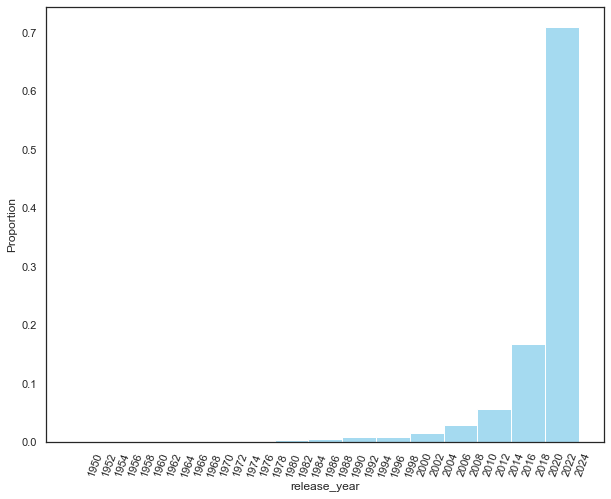

In [ ]:

fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue")

p1.set_xticks( range(  1950 , 2026, 2))
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=70, ha="right")

fig.savefig('p5_1.png', format='png', dpi=1200)

Hacemos la tabla anterior pero categorizando la variable `release_year` usando el mismo nº de intervalos que los usados en el histograma, así podremos comparar directamente el histograma con la tabla de frecuencias relativas, ya que ambos usan la funcion `cut()` para generar los intervalos.

In [ ]:
Netflix_Data['release_year_recode']  = pd.cut(x=Netflix_Data['release_year'] , bins=15 )

df_release_year_recode = pd.DataFrame( Netflix_Data.groupby('release_year_recode')['release_year_recode'].count().reset_index(name='count') ) 

df_release_year_recode['prop'] = df_release_year_recode['count'] / len(Netflix_Data)

df_release_year_recode['cum_prop'] = df_release_year_recode['prop'].cumsum()

In [ ]:
df_release_year_recode.sort_values(by='prop' , ascending=False).head(10)

,release_year_recode,count,prop,cum_prop
14,"(2016.867, 2022.0]",4144,0.708376,1.000000
13,"(2011.733, 2016.867]",980,0.167521,0.291624
12,"(2006.6, 2011.733]",322,0.055043,0.124103
11,"(2001.467, 2006.6]",168,0.028718,0.069060
10,"(1996.333, 2001.467]",82,0.014017,0.040342
9,"(1991.2, 1996.333]",50,0.008547,0.026325
8,"(1986.067, 1991.2]",45,0.007692,0.017778
7,"(1980.933, 1986.067]",24,0.004103,0.010085
6,"(1975.8, 1980.933]",13,0.002222,0.005983
5,"(1970.667, 1975.8]",8,0.001368,0.003761


Gracias a la tabla anterior tenemos información mas precisa sobre el histograma anterior, como por ejemplo:

- La barra más alta del histograma está asociada al intervalo [2017, 2022] y su altura es 0.708. Por tanto el 70.8% de titulos tienen un año de lanzamiento entre 2016 y 2022 (ambos incluidos).

- La segunda barra mas alta del histograma está asociada al intervalo [2012, 2016] y su altura es 0.168. Por tanto el 16.8% de los titulos fueron lanzados entre 2012 y 2016 (ambos incluidos).

- Por lo que el 87.6% (la inmensa mayoria) de los titulos fueron lanzados entre 2012 y 2022.

Podemos añadir lineas discontinuas verticales al anterior histograma para representar los valores de algunos de los estadisticos antes calculados, y asi representar de forma visual también esta información:

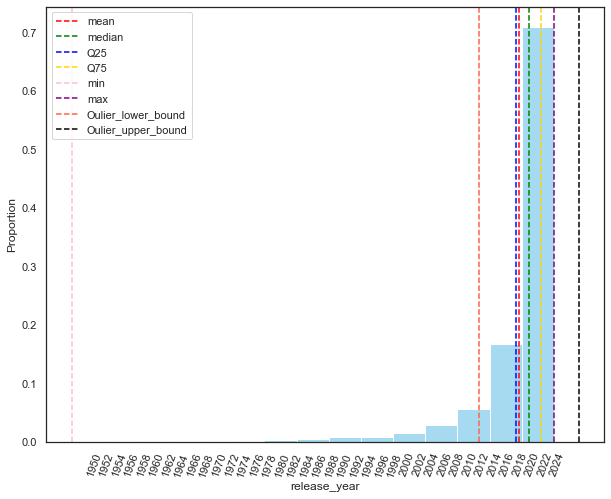

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue")

plt.axvline(x=mean, c='red', linestyle='dashed', label="mean")
plt.axvline(x=Q50, c='green', linestyle='dashed', label="median")
plt.axvline(x=Q25, c='blue', linestyle='dashed', label="Q25")
plt.axvline(x=Q75, c='gold', linestyle='dashed', label="Q75")
plt.axvline(x=min, c='pink', linestyle='dashed', label="min")
plt.axvline(x=max, c='purple', linestyle='dashed', label="max")
plt.axvline(x=Oulier_lower_bound, c='tomato', linestyle='dashed', label="Oulier_lower_bound")
plt.axvline(x=Oulier_upper_bound, c='black', linestyle='dashed', label="Oulier_lower_bound")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=90 , ha="right")

labels = ["mean", "median", "Q25", "Q75", "min", "max", "Oulier_lower_bound", "Oulier_upper_bound"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels, loc='upper left')


fig.savefig('p5_2.png', format='png', dpi=1200)

Ahora vamos a generar un box-plot para la variable `release_year`

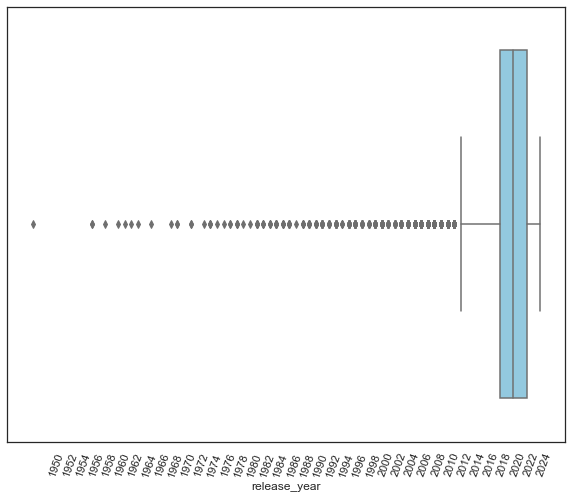

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=70 , ha="right")

fig.savefig('p6_1.png', format='png', dpi=1200)

Se evidencia como hay una buena proporción de outliers inferiores. Y se ve como la mayoria de los titulos tienen un año de lanzamiento posterior al 2016.

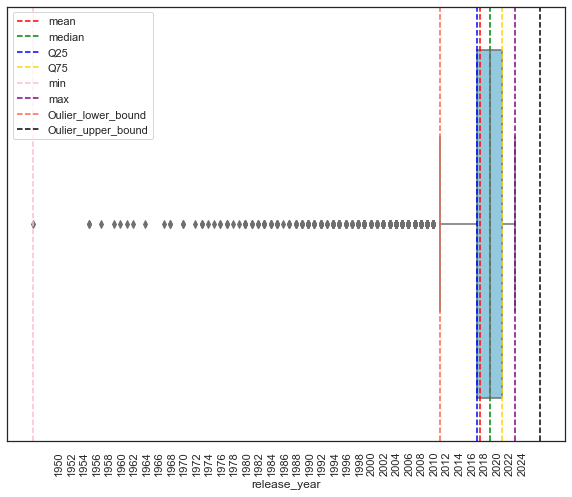

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue")

plt.axvline(x=mean, c='red', linestyle='dashed', label="mean")
plt.axvline(x=Q50, c='green', linestyle='dashed', label="median")
plt.axvline(x=Q25, c='blue', linestyle='dashed', label="Q25")
plt.axvline(x=Q75, c='gold', linestyle='dashed', label="Q75")
plt.axvline(x=min, c='pink', linestyle='dashed', label="min")
plt.axvline(x=max, c='purple', linestyle='dashed', label="max")
plt.axvline(x=Oulier_lower_bound, c='tomato', linestyle='dashed', label="Oulier_lower_bound")
plt.axvline(x=Oulier_upper_bound, c='black', linestyle='dashed', label="Oulier_lower_bound")

p1.set_xticks( range(  1950 , 2026, 2) )
ax.set_xticklabels(range( 1950 , 2026, 2), rotation=90 , ha="right")

labels = ["mean", "median", "Q25", "Q75", "min", "max", "Oulier_lower_bound", "Oulier_upper_bound"]
handles, _ = ax.get_legend_handles_labels()

# Slice list to remove first handle
plt.legend(handles = handles, labels = labels, loc='upper left')

fig.savefig('p6_2.png', format='png', dpi=1200)

In [ ]:
runtime_show = Netflix_Data.loc[ Netflix_Data['type']=='SHOW' , 'runtime']
runtime_movie = Netflix_Data.loc[ Netflix_Data['type']=='MOVIE' , 'runtime']

Netflix_Data['runtime_show'] = runtime_show
Netflix_Data['runtime_movie'] = runtime_movie

In [ ]:
mean = Netflix_Data['runtime_show'].mean()
sd = Netflix_Data['runtime_show'].std()
min = Netflix_Data['runtime_show'].min()
Q25 = Netflix_Data['runtime_show'].quantile(0.25)
Q50 = Netflix_Data['runtime_show'].quantile(0.5)
Q75 = Netflix_Data['runtime_show'].quantile(0.75)
max = Netflix_Data['runtime_show'].max()
Outlier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Outlier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['runtime_show'] < Outlier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['runtime_show'] > Outlier_upper_bound).sum()

prop_NA = Netflix_Data['runtime_show'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['runtime_show'] < Outlier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))
prop_upper_outliers = (Netflix_Data['runtime_show'] > Outlier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))

statistics_runtime_show = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Outlier_lower_bound':Outlier_lower_bound, 'Outlier_upper_bound':Outlier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Outlier_lower_bound', 'Outlier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['runtime_show'])

In [ ]:
statistics_runtime_show

,mean,sd,min,Q25,Q50,Q75,max,Outlier_lower_bound,Outlier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
runtime_show,38.978158,17.626354,0.0,25.0,41.0,49.0,190.0,-11.0,85.0,0,19,0.0,0.009022,0.64,0.36


Teniendo en cuenta los datos disponibles sobre títulos de Netflix:

- El número medio de episodios de los shows analizados es aproximadamente 39

- El número mediano de episodios del los shows es 41 , por lo que el 50% se los shows analizados tienen menos de 41 episodios. 


- El cuantil 25% es 25 , por lo que el 75% de las shows analizados (la gran mayoria) tienen más de 25 episodios. 

- El cuantil 75% es 49, por lo que la gran mayoria de los shows analizados no tienen mas de 49 episodios, solo un 25% tienen más episodios.

- De los dos anteriores puntos se deduce que el 50% de los shows tienen entre 25 y 49 episiodios. 

- El nº maximo de episodios de un show registrado es 190 y el mínimo 0.

- La cota inferior de outliers es -11. 

- La cota superior de outliers es 85. Por lo que todo show con mas de 85 episodios será considerado un outlier.

- El número de outliers inferiores es 0, es decir, no hay.

- El número de outliers superiores es 19, y  y la proporción sobre el total de datos disponibles de la variable (sin contar NA's) es 0.009, es decir, apenas hay un 1% de outliers superiores.

- El porcentaje de valores faltantes presente en la variable `runtime_movie` es del 64%.

In [ ]:
mean = Netflix_Data['runtime_movie'].mean()
sd = Netflix_Data['runtime_movie'].std()
min = Netflix_Data['runtime_movie'].min()
Q25 = Netflix_Data['runtime_movie'].quantile(0.25)
Q50 = Netflix_Data['runtime_movie'].quantile(0.5)
Q75 = Netflix_Data['runtime_movie'].quantile(0.75)
max = Netflix_Data['runtime_movie'].max()
Outlier_upper_bound = Q75 + 1.5*(Q75 - Q25)
Outlier_lower_bound = Q25 - 1.5*(Q75 - Q25)

n_lower_outliers = (Netflix_Data['runtime_movie'] < Outlier_lower_bound).sum()
n_upper_outliers = (Netflix_Data['runtime_movie'] > Outlier_upper_bound).sum()

prop_NA = Netflix_Data['runtime_movie'].isnull().sum() / len(Netflix_Data)
prop_not_NA = 1 - prop_NA

prop_lower_outliers = (Netflix_Data['runtime_movie'] < Outlier_lower_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))
prop_upper_outliers = (Netflix_Data['runtime_movie'] > Outlier_upper_bound).sum() / (prop_not_NA*len(Netflix_Data['runtime_show']))

statistics_runtime_movie = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max, 'Outlier_lower_bound':Outlier_lower_bound, 'Outlier_upper_bound':Outlier_upper_bound, 'n_lower_outliers':n_lower_outliers , 'n_upper_outliers':n_upper_outliers, 'prop_lower_outliers':prop_lower_outliers, 'prop_upper_outliers':prop_upper_outliers, 'prop_NA':prop_NA , 'prop_not_NA':prop_not_NA} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max', 'Outlier_lower_bound', 'Outlier_upper_bound', 'n_lower_outliers', 'n_upper_outliers', 'prop_lower_outliers', 'prop_upper_outliers', 'prop_NA' , 'prop_not_NA' ] , index=['runtime_movie'])

In [ ]:
statistics_runtime_movie

,mean,sd,min,Q25,Q50,Q75,max,Outlier_lower_bound,Outlier_upper_bound,n_lower_outliers,n_upper_outliers,prop_lower_outliers,prop_upper_outliers,prop_NA,prop_not_NA
runtime_movie,98.213675,30.64064,2.0,85.0,98.0,115.0,240.0,40.0,160.0,176,101,0.047009,0.026976,0.36,0.64


In [ ]:
mean = Netflix_Data['runtime_movie'].mean()
sd = Netflix_Data['runtime_movie'].std()
min = Netflix_Data['runtime_movie'].min()
Q25 = Netflix_Data['runtime_movie'].quantile(0.25)
Q50 = Netflix_Data['runtime_movie'].quantile(0.5)
Q75 = Netflix_Data['runtime_movie'].quantile(0.75)
max = Netflix_Data['runtime_movie'].max()


statistics_runtime_movie= pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['runtime_movie'])

In [ ]:
statistics_runtime_movie

,mean,sd,min,Q25,Q50,Q75,max
runtime_movie,98.213675,30.64064,2.0,85.0,98.0,115.0,240.0


In [ ]:
mean = Netflix_Data['seasons'].mean()
sd = Netflix_Data['seasons'].std()
min = Netflix_Data['seasons'].min()
Q25 = Netflix_Data['seasons'].quantile(0.25)
Q50 = Netflix_Data['seasons'].quantile(0.5)
Q75 = Netflix_Data['seasons'].quantile(0.75)
max = Netflix_Data['seasons'].max()


statistics_seasons = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['seasons'])

In [ ]:
statistics_seasons

,mean,sd,min,Q25,Q50,Q75,max
seasons,2.162868,2.689041,1.0,1.0,1.0,2.0,42.0


In [ ]:
mean = Netflix_Data['imdb_score'].mean()
sd = Netflix_Data['imdb_score'].std()
min = Netflix_Data['imdb_score'].min()
Q25 = Netflix_Data['imdb_score'].quantile(0.25)
Q50 = Netflix_Data['imdb_score'].quantile(0.5)
Q75 = Netflix_Data['imdb_score'].quantile(0.75)
max = Netflix_Data['imdb_score'].max()


statistics_imdb_score = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['imdb_score'])

In [ ]:
statistics_imdb_score

,mean,sd,min,Q25,Q50,Q75,max
imdb_score,6.510861,1.163826,1.5,5.8,6.6,7.3,9.6


In [ ]:
mean = Netflix_Data['imdb_votes'].mean()
sd = Netflix_Data['imdb_votes'].std()
min = Netflix_Data['imdb_votes'].min()
Q25 = Netflix_Data['imdb_votes'].quantile(0.25)
Q50 = Netflix_Data['imdb_votes'].quantile(0.5)
Q75 = Netflix_Data['imdb_votes'].quantile(0.75)
max = Netflix_Data['imdb_votes'].max()


statistics_imdb_votes = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['imdb_votes'])

In [ ]:
statistics_imdb_votes

,mean,sd,min,Q25,Q50,Q75,max
imdb_votes,23439.382474,95820.470909,5.0,516.75,2233.5,9494.0,2294231.0


In [ ]:
mean = Netflix_Data['tmdb_popularity'].mean()
sd = Netflix_Data['tmdb_popularity'].std()
min = Netflix_Data['tmdb_popularity'].min()
Q25 = Netflix_Data['tmdb_popularity'].quantile(0.25)
Q50 = Netflix_Data['tmdb_popularity'].quantile(0.5)
Q75 = Netflix_Data['tmdb_popularity'].quantile(0.75)
max = Netflix_Data['tmdb_popularity'].max()


statistics_tmdb_popularity = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['tmdb_popularity'])

In [ ]:
statistics_tmdb_popularity

,mean,sd,min,Q25,Q50,Q75,max
tmdb_popularity,22.637925,81.680263,0.009442,2.7285,6.821,16.59,2274.044


In [ ]:
mean = Netflix_Data['tmdb_score'].mean()
sd = Netflix_Data['tmdb_score'].std()
min = Netflix_Data['tmdb_score'].min()
Q25 = Netflix_Data['tmdb_score'].quantile(0.25)
Q50 = Netflix_Data['tmdb_score'].quantile(0.5)
Q75 = Netflix_Data['tmdb_score'].quantile(0.75)
max = Netflix_Data['tmdb_score'].max()


statistics_tmdb_score = pd.DataFrame({'mean':mean , 'sd':sd , 'min':min, 'Q25':Q25, 'Q50':Q50, 'Q75':Q75, 'max':max} , 

            columns=['mean', 'sd', 'min', 'Q25', 'Q50', 'Q75', 'max'] , index=['tmdb_score'])

In [ ]:
statistics_tmdb_score

,mean,sd,min,Q25,Q50,Q75,max
tmdb_score,6.829175,1.170391,0.5,6.1,6.9,7.5375,10.0


In [ ]:
df_age_certification = pd.DataFrame( Netflix_Data.groupby('age_certification')['age_certification'].count().reset_index(name='count') ) 

df_age_certification['prop'] = df_age_certification['count'] / len(Netflix_Data)

df_age_certification = df_age_certification.sort_values(by='prop' , ascending=False)

df_age_certification

,age_certification,count,prop
7,TV-MA,883,0.150940
4,R,556,0.095043
5,TV-14,474,0.081026
3,PG-13,451,0.077094
2,PG,233,0.039829
8,TV-PG,188,0.032137
0,G,124,0.021197
10,TV-Y7,120,0.020513
9,TV-Y,107,0.018291
6,TV-G,79,0.013504


In [ ]:
df_genres = pd.DataFrame( Netflix_Data.groupby('genres')['genres'].count().reset_index(name='count') ) 

df_genres['prop'] = df_genres['count'] / len(Netflix_Data)

df_genres['cum_prop'] = df_genres['prop'].cumsum()

df_genres.head(10)

,genres,count,prop,cum_prop
0,"['action', 'animation', 'comedy', 'drama', 'fa...",1,0.000171,0.000171
1,"['action', 'animation', 'comedy', 'drama', 'fa...",2,0.000342,0.000513
2,"['action', 'animation', 'comedy', 'family', 'f...",2,0.000342,0.000855
3,"['action', 'animation', 'comedy', 'family', 'm...",1,0.000171,0.001026
4,"['action', 'animation', 'comedy', 'family']",4,0.000684,0.001709
5,"['action', 'animation', 'comedy', 'fantasy', '...",1,0.000171,0.001880
6,"['action', 'animation', 'comedy', 'fantasy']",1,0.000171,0.002051
7,"['action', 'animation', 'comedy', 'thriller', ...",1,0.000171,0.002222
8,"['action', 'animation', 'comedy']",1,0.000171,0.002393
9,"['action', 'animation', 'drama']",1,0.000171,0.002564


In [ ]:
df_genres.sort_values(by='prop' , ascending=False)

,genres,count,prop,cum_prop
563,['comedy'],484,0.082735,0.339658
715,['documentation'],329,0.056239,0.494017
1061,['drama'],328,0.056068,0.736923
458,"['comedy', 'drama']",135,0.023077,0.202393
959,"['drama', 'romance']",124,0.021197,0.640855
...,...,...,...,...
720,"['drama', 'action', 'comedy', 'romance', 'thri...",1,0.000171,0.494872
719,"['drama', 'action', 'comedy', 'romance', 'crime']",1,0.000171,0.494701
718,"['drama', 'action', 'comedy', 'family']",1,0.000171,0.494530
717,"['drama', 'action', 'comedy', 'crime']",1,0.000171,0.494359


In [ ]:
df_production_countries = pd.DataFrame( Netflix_Data.groupby('production_countries')['production_countries'].count().reset_index(name='count') ) 

df_production_countries['prop'] = df_production_countries['count'] / len(Netflix_Data)

df_production_countries['cum_prop'] = df_production_countries['prop'].cumsum()

df_production_countries.head(10)

,production_countries,count,prop,cum_prop
0,"['AE', 'FR', 'JO', 'LB', 'QA', 'PS']",1,0.000171,0.000171
1,"['AE', 'LB']",2,0.000342,0.000513
2,"['AE', 'US']",1,0.000171,0.000684
3,['AE'],11,0.001880,0.002564
4,"['AF', 'DE', 'PS']",1,0.000171,0.002735
5,['AF'],1,0.000171,0.002906
6,"['AR', 'CL']",1,0.000171,0.003077
7,"['AR', 'CO']",1,0.000171,0.003248
8,"['AR', 'DE', 'UY', 'ES']",1,0.000171,0.003419
9,"['AR', 'ES', 'UY']",1,0.000171,0.003590


In [ ]:
df_production_countries.sort_values(by='prop' , ascending=False)

,production_countries,count,prop,cum_prop
438,['US'],1959,0.334872,0.949060
237,['IN'],599,0.102393,0.370769
264,['JP'],264,0.045128,0.431453
451,[],229,0.039145,1.000000
269,['KR'],222,0.037949,0.470598
...,...,...,...,...
167,"['FR', 'NL', 'SG']",1,0.000171,0.170427
166,"['FR', 'NL', 'GB', 'US']",1,0.000171,0.170256
165,"['FR', 'MX', 'ES']",1,0.000171,0.170085
164,"['FR', 'MX', 'CO']",1,0.000171,0.169915


In [ ]:
df_seasons = pd.DataFrame( Netflix_Data.groupby('seasons')['seasons'].count().reset_index(name='count') ) 

n_shows = ((1-0.64)*len(Netflix_Data))

df_seasons['prop'] = df_seasons['count'] / n_shows

df_seasons['cum_prop'] = df_seasons['prop'].cumsum()

df_seasons.head(10)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
9,10.0,6,0.002849,0.985755


In [ ]:
df_seasons.sort_values(by='prop' , ascending=False)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
10,11.0,8,0.003799,0.989554


In [ ]:
intervals = [Netflix_Data['imdb_score'].min(), Netflix_Data['imdb_score'].quantile(0.25), Netflix_Data['imdb_score'].quantile(0.5) , Netflix_Data['imdb_score'].quantile(0.75) , Netflix_Data['imdb_score'].max()]

Netflix_Data['imdb_score_recode']  = pd.cut(x=Netflix_Data['imdb_score'] , bins=intervals )

df_imdb_score_recode = pd.DataFrame( Netflix_Data.groupby('imdb_score_recode')['imdb_score_recode'].count().reset_index(name='count') ) 

df_imdb_score_recode['prop'] = df_imdb_score_recode['count'] / len(Netflix_Data)

df_imdb_score_recode['cum_prop'] = df_imdb_score_recode['prop'].cumsum()

df_imdb_score_recode.head(10)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
2,"(6.6, 7.3]",1302,0.222564,0.691282
3,"(7.3, 9.6]",1323,0.226154,0.917436


In [ ]:
df_imdb_score_recode.sort_values(by='prop' , ascending=False)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
3,"(7.3, 9.6]",1323,0.226154,0.917436
2,"(6.6, 7.3]",1302,0.222564,0.691282


In [ ]:
intervals = [Netflix_Data['imdb_votes'].min(), Netflix_Data['imdb_votes'].quantile(0.25), Netflix_Data['imdb_votes'].quantile(0.5) , Netflix_Data['imdb_votes'].quantile(0.75) , Netflix_Data['imdb_votes'].max()]

Netflix_Data['imdb_votes_recode']  = pd.cut(x=Netflix_Data['imdb_votes'] , bins=intervals )

df_imdb_votes_recode = pd.DataFrame( Netflix_Data.groupby('imdb_votes_recode')['imdb_votes_recode'].count().reset_index(name='count') ) 

df_imdb_votes_recode['prop'] = df_imdb_votes_recode['count'] / len(Netflix_Data)

df_imdb_votes_recode['cum_prop'] = df_imdb_votes_recode['prop'].cumsum()

df_imdb_votes_recode.head(10)

,imdb_votes_recode,count,prop,cum_prop
0,"(5.0, 516.75]",1332,0.227692,0.227692
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846


In [ ]:
df_imdb_votes_recode.sort_values(by='prop' , ascending=False)

,imdb_votes_recode,count,prop,cum_prop
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846
0,"(5.0, 516.75]",1332,0.227692,0.227692


In [ ]:
intervals = [Netflix_Data['tmdb_popularity'].min(), Netflix_Data['tmdb_popularity'].quantile(0.25), Netflix_Data['tmdb_popularity'].quantile(0.5) , Netflix_Data['tmdb_popularity'].quantile(0.75) , Netflix_Data['tmdb_popularity'].max()]

Netflix_Data['tmdb_popularity_recode']  = pd.cut(x=Netflix_Data['tmdb_popularity'] , bins=intervals )

df_tmdb_popularity_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_popularity_recode')['tmdb_popularity_recode'].count().reset_index(name='count') ) 

df_tmdb_popularity_recode['prop'] = df_tmdb_popularity_recode['count'] / len(Netflix_Data)

df_tmdb_popularity_recode['cum_prop'] = df_tmdb_popularity_recode['prop'].cumsum()

df_tmdb_popularity_recode.head(10)

,tmdb_popularity_recode,count,prop,cum_prop
0,"(0.00944, 2.728]",1439,0.245983,0.245983
1,"(2.728, 6.821]",1440,0.246154,0.492137
2,"(6.821, 16.59]",1439,0.245983,0.738120
3,"(16.59, 2274.044]",1440,0.246154,0.984274


In [ ]:
df_tmdb_popularity_recode.sort_values(by='prop' , ascending=False)

,tmdb_popularity_recode,count,prop,cum_prop
1,"(2.728, 6.821]",1440,0.246154,0.492137
3,"(16.59, 2274.044]",1440,0.246154,0.984274
0,"(0.00944, 2.728]",1439,0.245983,0.245983
2,"(6.821, 16.59]",1439,0.245983,0.738120


In [ ]:
intervals = [Netflix_Data['tmdb_score'].min(), Netflix_Data['tmdb_score'].quantile(0.25), Netflix_Data['tmdb_score'].quantile(0.5) , Netflix_Data['tmdb_score'].quantile(0.75) , Netflix_Data['tmdb_score'].max()]

Netflix_Data['tmdb_score_recode']  = pd.cut(x=Netflix_Data['tmdb_score'] , bins=intervals )

df_tmdb_score_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_score_recode')['tmdb_score_recode'].count().reset_index(name='count') ) 

df_tmdb_score_recode['prop'] = df_tmdb_score_recode['count'] / len(Netflix_Data)

df_tmdb_score_recode['cum_prop'] = df_tmdb_score_recode['prop'].cumsum()

df_tmdb_score_recode.head(10)

,tmdb_score_recode,count,prop,cum_prop
0,"(0.5, 6.1]",1400,0.239316,0.239316
1,"(6.1, 6.9]",1472,0.251624,0.490940
2,"(6.9, 7.538]",1281,0.218974,0.709915
3,"(7.538, 10.0]",1385,0.236752,0.946667


In [ ]:
df_tmdb_score_recode.sort_values(by='prop' , ascending=False)

,tmdb_score_recode,count,prop,cum_prop
1,"(6.1, 6.9]",1472,0.251624,0.490940
0,"(0.5, 6.1]",1400,0.239316,0.239316
3,"(7.538, 10.0]",1385,0.236752,0.946667
2,"(6.9, 7.538]",1281,0.218974,0.709915


In [ ]:
intervals = [Netflix_Data['runtime_show'].min(), Netflix_Data['runtime_show'].quantile(0.25), Netflix_Data['runtime_show'].quantile(0.5) , Netflix_Data['runtime_show'].quantile(0.75) , Netflix_Data['runtime_show'].max()]

Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=intervals )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(0.0, 25.0]",571,0.271130,0.271130
1,"(25.0, 41.0]",474,0.225071,0.496201
2,"(41.0, 49.0]",536,0.254511,0.750712
3,"(49.0, 190.0]",511,0.242640,0.993352


In [ ]:
Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=8 )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(-0.19, 23.75]",382,0.181387,0.181387
1,"(23.75, 47.5]",1108,0.526116,0.707502
2,"(47.5, 71.25]",556,0.264008,0.971510
3,"(71.25, 95.0]",52,0.024691,0.996201
4,"(95.0, 118.75]",4,0.001899,0.998101
5,"(118.75, 142.5]",2,0.000950,0.999050
6,"(142.5, 166.25]",0,0.000000,0.999050
7,"(166.25, 190.0]",2,0.000950,1.000000


In [ ]:
intervals = [Netflix_Data['runtime_movie'].min(), Netflix_Data['runtime_movie'].quantile(0.25), Netflix_Data['runtime_movie'].quantile(0.5) , Netflix_Data['runtime_movie'].quantile(0.75) , Netflix_Data['runtime_movie'].max()]

Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=intervals )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(2.0, 85.0]",952,0.254274,0.254274
1,"(85.0, 98.0]",942,0.251603,0.505876
2,"(98.0, 115.0]",944,0.252137,0.758013
3,"(115.0, 240.0]",905,0.241720,0.999733


In [ ]:
Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=6 )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(1.762, 41.667]",187,0.049947,0.049947
1,"(41.667, 81.333]",621,0.165865,0.215812
2,"(81.333, 121.0]",2238,0.597756,0.813568
3,"(121.0, 160.667]",597,0.159455,0.973024
4,"(160.667, 200.333]",93,0.024840,0.997863
5,"(200.333, 240.0]",8,0.002137,1.000000
